# Exploratory Data Analysis

The puspose of this notebook is to look at the data, understand such data and develop the code that will fix or adjust the data for the model.

The approch for the EDA is to see some of the features that the data have, which are the following:

- **id**: Station Code
- **latitude**: Latitud of the station
- **longitude**: Longitud of the station
- **name**: Name of the station
- **light**: Occupation grade (0=low, 1=medium, 3=high)
- **number**: Logical name of the Base Station
- **actívate**: Station active (0=Not activated, 1=activated)
- **no_available**: Station Availability (0=Available, 1=Not available)
- **total_bases**: Number of station bases
- **dock_bikes**: Number of anchored bicycles
- **free_bases**: Number of free bases
- **reservations_count**: Number of active reservations

Kindly note that some of them are not relevant such as **id, latitude, longitude, name, and number**, since some of them have been already used for the group by postal code or because are just station identifiers.

Therefore, the index of this notebook will be accordin to each feature we want to study:

1. Actívate.
2. no_available
3. total_bases, dock_bikes, free_bases
4. reservations_count
5. Light
6. Plot series by Postal Code

*NOTE: Kindly note that this notebook has been "cleaned up" and all the code has been organized for your easy understanding.*

#### Import libraries

In [1]:
#Import libraries
import os
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
#Get the preprocessig.py data path
cwd = os.getcwd()
cwd_list = cwd.split(os.sep)
preprocessing_path = os.path.join(os.sep.join(cwd_list[:-1]), '01-Preprocessing_Data')
preprocessing_path

'/home/gonzalo/Repos/TFM/01-Preprocessing_Data'

In [3]:
#Load preprocessing
%cd $preprocessing_path
import preprocessing as pre
%cd $cwd

/home/gonzalo/Repos/TFM/01-Preprocessing_Data
/home/gonzalo/Repos/TFM/02-EDA


**Please, define the data path where the DATA have been unzip**

In [4]:
data_path = ''

In [5]:
#Define data path WINDOWS developer's computer
# data_path = os.path.join(os.sep.join(cwd_list[:-1]), 'DATA')
# data_path

In [6]:
#Define data path LINUX developer's computer
# data_path = '/home/gonzalo/Data/TFM/DATA/'
# data_path

'/home/gonzalo/Data/TFM/DATA/'

In [7]:
#for seeing the entire dataframe
pd.set_option('display.expand_frame_repr', False)

## 1. Activate

It is been decided to study this features first because to know if is there any station that has been desactivated is much important.

In [8]:
#Create the dataframe with activate feature
df_activate = pre.make_all_dataset(data_path, 'activate')

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet


In [9]:
#Let's see a sample of the dataframe
df_activate.sample(5)

Date  1-1a_activate  2-1b_activate  3-2_activate  4-3_activate  5-4_activate  6-5_activate  7-6_activate  8-7_activate  9-8_activate  10-9_activate  11-10_activate  12-11_activate  13-12_activate  14-13_activate  15-14_activate  16-15_activate  17-16_activate  18-17_activate  19-18_activate  20-19_activate  21-20a_activate  23-21a_activate  24-21b_activate  25-22_activate  26-23_activate  27-24_activate  28-25a_activate  29-25b_activate  30-26_activate  31-27_activate  32-28_activate  33-29_activate  34-30_activate  35-31_activate  36-32_activate  37-33_activate  38-34_activate  39-35_activate  40-36_activate  41-37_activate  42-38_activate  43-39_activate  44-40_activate  45-41_activate  46-42_activate  47-43_activate  48-44_activate  49-45_activate  50-46_activate  51-47_activate  52-48_activate  53-49_activate  54-50_activate  55-51_activate  56-52_activate  57-53_activate  58-54_activate  59-55_activate  60-56_activate  61-57_activate  62-58_activate  63-59_activate  64-60_activate  65-61_activate  66-62_activate  67-63_activate  69-65_activate  71-67_activate  72-68_activate  73-69_activate  74-70_activate  75-71_activate  76-72_activate  77-73_activate  78-74_activate  79-75_activate  80-76_activate  81-77_activate  82-78_activate  83-79_activate  84-80a_activate  85-80b_activate  86-81_activate  87-82_activate  88-83_activate  89-84_activate  90-85_activate  91-86_activate  92-87_activate  93-88_activate  94-89_activate  95-90_activate  96-91_activate  97-92_activate  98-93_activate  99-94_activate  100-95_activate  101-96_activate  102-97_activate  103-98_activate  104-99_activate  105-100_activate  106-101_activate  107-102_activate  108-103_activate  109-104_activate  110-105_activate  111-106a_activate  112-106b_activate  113-107_activate  114-108_activate  115-109_activate  116-110_activate  117-111a_activate  118-111b_activate  119-112_activate  120-113_activate  121-114_activate  122-115_activate  123-116a_activate  124-116b_activate  125-117_activate  126-118_activate  127-119_activate  128-120_activate  129-121_activate  130-122_activate  131-123_activate  169-124_activate  164-125_activate  163-126_activate  168-127_activate  160-128_activate  161-129_activate  157-130_activate  156-131_activate  149-132_activate  150-133_activate  153-134_activate  158-135_activate  151-136_activate  152-137_activate  154-138_activate  159-139_activate  162-140_activate  165-141_activate  167-142_activate  166-143_activate  170-144_activate  171-145_activate  155-146_activate  148-147_activate  144-148_activate  146-149_activate  147-150_activate  145-151_activate  142-152_activate  143-153_activate  141-154_activate  139-155_activate  140-156_activate  137-157_activate  138-158_activate  173-159_activate  172-160_activate  132-161_activate  133-162_activate  134-163_activate  136-164_activate  135-165_activate  174-166_activate  175-167_activate
3830 2019-01-07 06:54:00              1              1             1             1             1             1             1             1             1              1               1               1               1               1               1               1               1               1               1               1                1                1                1               1               1               1                1                1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1               1

#### Is there any station desactivated at anytime?

In [10]:
#Check size of the dataset
df_activate.shape

(4422, 173)

In [11]:
#check size of the dataset dropping all activated
df_activate[df_activate == 0].dropna(axis=1, how='all').shape

(4422, 0)

### Conclusions point *1. Activate*

#### Good one! all the stations have been activated for the recording data time.

## 2. No_available

In [12]:
#Make the dataset with the feature No_available
df_no_available = pre.make_all_dataset(data_path, 'no_available')

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet


In [13]:
#Let's see a sample of the dataset
df_no_available.sample(5)

Date  1-1a_no_available  2-1b_no_available  3-2_no_available  4-3_no_available  5-4_no_available  6-5_no_available  7-6_no_available  8-7_no_available  9-8_no_available  10-9_no_available  11-10_no_available  12-11_no_available  13-12_no_available  14-13_no_available  15-14_no_available  16-15_no_available  17-16_no_available  18-17_no_available  19-18_no_available  20-19_no_available  21-20a_no_available  23-21a_no_available  24-21b_no_available  25-22_no_available  26-23_no_available  27-24_no_available  28-25a_no_available  29-25b_no_available  30-26_no_available  31-27_no_available  32-28_no_available  33-29_no_available  34-30_no_available  35-31_no_available  36-32_no_available  37-33_no_available  38-34_no_available  39-35_no_available  40-36_no_available  41-37_no_available  42-38_no_available  43-39_no_available  44-40_no_available  45-41_no_available  46-42_no_available  47-43_no_available  48-44_no_available  49-45_no_available  50-46_no_available  51-47_no_available  52-48_no_available  53-49_no_available  54-50_no_available  55-51_no_available  56-52_no_available  57-53_no_available  58-54_no_available  59-55_no_available  60-56_no_available  61-57_no_available  62-58_no_available  63-59_no_available  64-60_no_available  65-61_no_available  66-62_no_available  67-63_no_available  69-65_no_available  71-67_no_available  72-68_no_available  73-69_no_available  74-70_no_available  75-71_no_available  76-72_no_available  77-73_no_available  78-74_no_available  79-75_no_available  80-76_no_available  81-77_no_available  82-78_no_available  83-79_no_available  84-80a_no_available  85-80b_no_available  86-81_no_available  87-82_no_available  88-83_no_available  89-84_no_available  90-85_no_available  91-86_no_available  92-87_no_available  93-88_no_available  94-89_no_available  95-90_no_available  96-91_no_available  97-92_no_available  98-93_no_available  99-94_no_available  100-95_no_available  101-96_no_available  102-97_no_available  103-98_no_available  104-99_no_available  105-100_no_available  106-101_no_available  107-102_no_available  108-103_no_available  109-104_no_available  110-105_no_available  111-106a_no_available  112-106b_no_available  113-107_no_available  114-108_no_available  115-109_no_available  116-110_no_available  117-111a_no_available  118-111b_no_available  119-112_no_available  120-113_no_available  121-114_no_available  122-115_no_available  123-116a_no_available  124-116b_no_available  125-117_no_available  126-118_no_available  127-119_no_available  128-120_no_available  129-121_no_available  130-122_no_available  131-123_no_available  169-124_no_available  164-125_no_available  163-126_no_available  168-127_no_available  160-128_no_available  161-129_no_available  157-130_no_available  156-131_no_available  149-132_no_available  150-133_no_available  153-134_no_available  158-135_no_available  151-136_no_available  152-137_no_available  154-138_no_available  159-139_no_available  162-140_no_available  165-141_no_available  167-142_no_available  166-143_no_available  170-144_no_available  171-145_no_available  155-146_no_available  148-147_no_available  144-148_no_available  146-149_no_available  147-150_no_available  145-151_no_available  142-152_no_available  143-153_no_available  141-154_no_available  139-155_no_available  140-156_no_available  137-157_no_available  138-158_no_available  173-159_no_available  172-160_no_available  132-161_no_available  133-162_no_available  134-163_no_available  136-164_no_available  135-165_no_available  174-166_no_available  175-167_no_available
4330 2019-01-28 05:07:00                  0                  0                 0                 0                 0                 0                 0                 0                 0                  0                   0                   0                   0                   0                   0                   0                   0                   0                   0                   0     

In [14]:
#Let's see the info of the dataframe
df_no_available.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Columns: 173 entries, Date to 175-167_no_available
dtypes: datetime64[ns](1), int64(172)
memory usage: 5.8 MB


In [15]:
#Let's see the statistics 
df_no_available.describe()

1-1a_no_available  2-1b_no_available  3-2_no_available  4-3_no_available  5-4_no_available  6-5_no_available  7-6_no_available  8-7_no_available  9-8_no_available  10-9_no_available  11-10_no_available  12-11_no_available  13-12_no_available  14-13_no_available  15-14_no_available  16-15_no_available  17-16_no_available  18-17_no_available  19-18_no_available  20-19_no_available  21-20a_no_available  23-21a_no_available  24-21b_no_available  25-22_no_available  26-23_no_available  27-24_no_available  28-25a_no_available  29-25b_no_available  30-26_no_available  31-27_no_available  32-28_no_available  33-29_no_available  34-30_no_available  35-31_no_available  36-32_no_available  37-33_no_available  38-34_no_available  39-35_no_available  40-36_no_available  41-37_no_available  42-38_no_available  43-39_no_available  44-40_no_available  45-41_no_available  46-42_no_available  47-43_no_available  48-44_no_available  49-45_no_available  50-46_no_available  51-47_no_available  52-48_no_available  53-49_no_available  54-50_no_available  55-51_no_available  56-52_no_available  57-53_no_available  58-54_no_available  59-55_no_available  60-56_no_available  61-57_no_available  62-58_no_available  63-59_no_available  64-60_no_available  65-61_no_available  66-62_no_available  67-63_no_available  69-65_no_available  71-67_no_available  72-68_no_available  73-69_no_available  74-70_no_available  75-71_no_available  76-72_no_available  77-73_no_available  78-74_no_available  79-75_no_available  80-76_no_available  81-77_no_available  82-78_no_available  83-79_no_available  84-80a_no_available  85-80b_no_available  86-81_no_available  87-82_no_available  88-83_no_available  89-84_no_available  90-85_no_available  91-86_no_available  92-87_no_available  93-88_no_available  94-89_no_available  95-90_no_available  96-91_no_available  97-92_no_available  98-93_no_available  99-94_no_available  100-95_no_available  101-96_no_available  102-97_no_available  103-98_no_available  104-99_no_available  105-100_no_available  106-101_no_available  107-102_no_available  108-103_no_available  109-104_no_available  110-105_no_available  111-106a_no_available  112-106b_no_available  113-107_no_available  114-108_no_available  115-109_no_available  116-110_no_available  117-111a_no_available  118-111b_no_available  119-112_no_available  120-113_no_available  121-114_no_available  122-115_no_available  123-116a_no_available  124-116b_no_available  125-117_no_available  126-118_no_available  127-119_no_available  128-120_no_available  129-121_no_available  130-122_no_available  131-123_no_available  169-124_no_available  164-125_no_available  163-126_no_available  168-127_no_available  160-128_no_available  161-129_no_available  157-130_no_available  156-131_no_available  149-132_no_available  150-133_no_available  153-134_no_available  158-135_no_available  151-136_no_available  152-137_no_available  154-138_no_available  159-139_no_available  162-140_no_available  165-141_no_available  167-142_no_available  166-143_no_available  170-144_no_available  171-145_no_available  155-146_no_available  148-147_no_available  144-148_no_available  146-149_no_available  147-150_no_available  145-151_no_available  142-152_no_available  143-153_no_available  141-154_no_available  139-155_no_available  140-156_no_available  137-157_no_available  138-158_no_available  173-159_no_available  172-160_no_available  132-161_no_available  133-162_no_available  134-163_no_available  136-164_no_available  135-165_no_available  174-166_no_available  175-167_no_available
count        4422.000000        4422.000000       4422.000000       4422.000000            4422.0            4422.0            4422.0            4422.0       4422.000000        4422.000000         4422.000000              4422.0              4422.0              4422.0         4422.000000         4422.000000              4422.0         4422.000000         4422.000000         4422.000000               4422.0         

#### Is there any station that have not been available at any time? obviously there is as we can see above *(df_no_available.describe())*, but let's check how many.

In [16]:
#Let's check if there are stations that have been not avalaible for some time
df_no_available[df_no_available == 1].dropna(axis=1, how='all').shape

(4422, 116)

#### It seems that a lot stations have been not available at any time

In [17]:
#Libraries
import seaborn as sns
import matplotlib.pyplot as plt

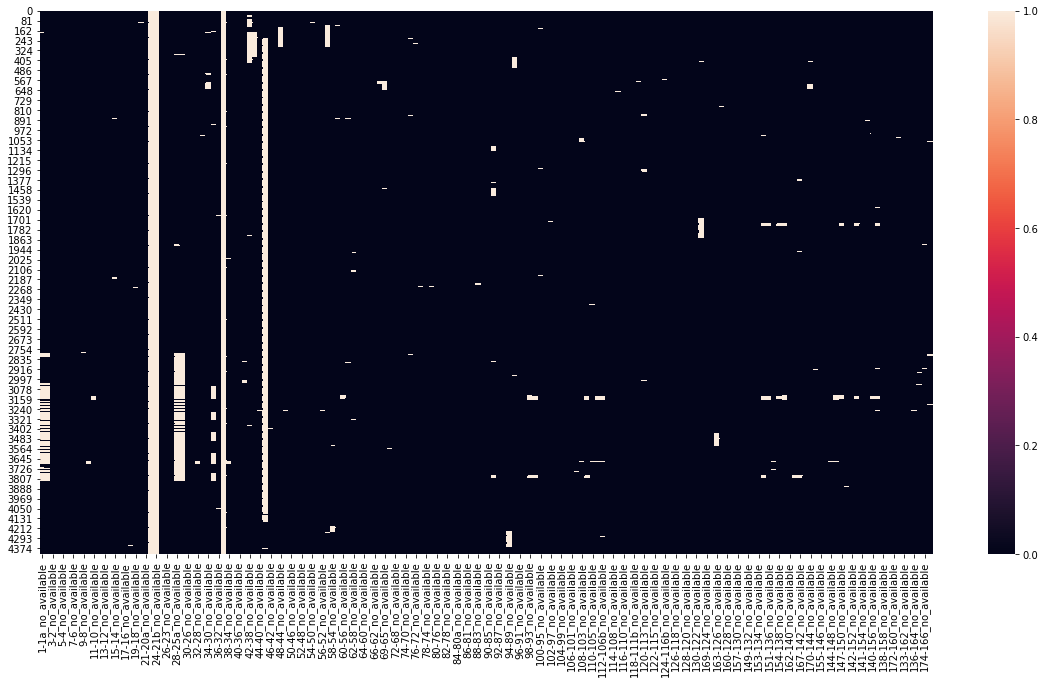

In [18]:
#Let's see a plot of the dataset, so we can see better which stations have not been available
df_no_available = df_no_available[df_no_available.columns[1:]].astype(float) 
plt.figure(figsize=(20,10))
sns.heatmap(df_no_available)
plt.show()

#### As we can see in the heatmap, there are at least two stations that have not been avaliable at any time and one that have almost been like the other two

#### Which stations are?

In [19]:
#Let's check which stations have not been avaliables for the whole time
df_no_available[df_no_available == 1].dropna(axis=1, how='any')

23-21a_no_available  24-21b_no_available  37-33_no_available
0                     1.0                  1.0                 1.0
1                     1.0                  1.0                 1.0
2                     1.0                  1.0                 1.0
3                     1.0                  1.0                 1.0
4                     1.0                  1.0                 1.0
5                     1.0                  1.0                 1.0
6                     1.0                  1.0                 1.0
7                     1.0                  1.0                 1.0
8                     1.0                  1.0                 1.0
9                     1.0                  1.0                 1.0
10                    1.0                  1.0                 1.0
11                    1.0                  1.0                 1.0
12                    1.0                  1.0                 1.0
13                    1.0                  1.0                 1.0
14                    1.0                  1.0                 1.0
15                    1.0                  1.0                 1.0
16                    1.0                  1.0                 1.0
17                    1.0                  1.0                 1.0
18                    1.0                  1.0                 1.0
19                    1.0                  1.0                 1.0
20                    1.0                  1.0                 1.0
21                    1.0                  1.0                 1.0
22                    1.0                  1.0                 1.0
23                    1.0                  1.0                 1.0
24                    1.0                  1.0                 1.0
25                    1.0                  1.0                 1.0
26                    1.0                  1.0                 1.0
27                    1.0                  1.0                 1.0
28                    1.0                  1.0                 1.0
29                    1.0                  1.0                 1.0
...                   ...                  ...                 ...
4392                  1.0                  1.0                 1.0
4393                  1.0                  1.0                 1.0
4394                  1.0                  1.0                 1.0
4395                  1.0                  1.0                 1.0
4396                  1.0                  1.0                 1.0
4397                  1.0                  1.0                 1.0
4398                  1.0                  1.0                 1.0
4399                  1.0                  1.0                 1.0
4400                  1.0                  1.0                 1.0
4401                  1.0                  1.0                 1.0
4402                  1.0                  1.0                 1.0
4403                  1.0                  1.0                 1.0
4404                  1.0                  1.0                 1.0
4405                  1.0                  1.0                 1.0
4406                  1.0                  1.0                 1.0
4407                  1.0                  1.0                 1.0
4408                  1.0                  1.0                 1.0
4409                  1.0                  1.0                 1.0
4410                  1.0                  1.0                 1.0
4411                  1.0                  1.0                 1.0
4412                  1.0                  1.0                 1.0
4413                  1.0                  1.0                 1.0
4414                  1.0                  1.0                 1.0
4415                  1.0                  1.0                 1.0
4416                  1.0                  1.0                 1.0
4417                  1.0                  1.0                 1.0
4418                  1.0                  1.0                 1.0
4419                  1.0                  1.0       

#### As we can confirm, there are three stations that have not been avaliable at any time, since two are next to the other in the heat map and they seemed only one:

- 23-21a
- 24-21b
- 37-33

In [20]:
#Percentage of not NaN in each column:
df_no_available_NOT_NAN = df_no_available[df_no_available == 1].isna().sum() / df_no_available.shape[0]

In [21]:
#Besides, let's se which stations have been no available for more than the 50% of the time
df_no_available_NOT_NAN[df_no_available_NOT_NAN < 0.5]

23-21a_no_available    0.000000
24-21b_no_available    0.000000
37-33_no_available     0.000000
45-41_no_available     0.108096
dtype: float64

#### The other station that is almost not avaliable at any time is the station 45-41.

#### Therefore, the stations that we have to manage with this situation are:

- 23-21a
- 24-21b
- 37-33
- 45-41

If we plot the headmap without these stations:

In [22]:
#Make the dataset without such stations
df_no_available_2_columns = df_no_available.columns.map(lambda x: x not in ['23-21a_no_available',
                                                                              '24-21b_no_available',
                                                                              '37-33_no_available',
                                                                              '45-41_no_available'])
df_no_available_2_columns

Index([True, True, True, True, True, True, True, True, True, True,
       ...
       True, True, True, True, True, True, True, True, True, True],
      dtype='object', length=172)

In [23]:
#Make the dataset without such stations
df_no_available_2 = df_no_available.loc[:, df_no_available_2_columns]

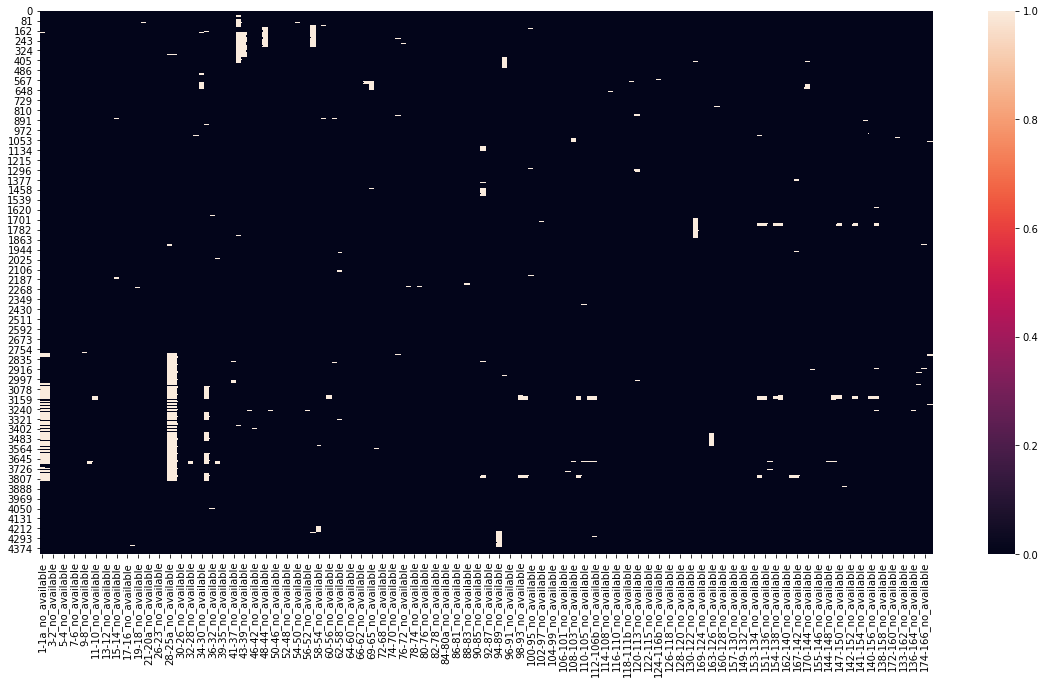

In [24]:
#Plot such dataset
plt.figure(figsize=(20,10))
sns.heatmap(df_no_available_2)
plt.show()

#### Why have such station been not available? 

Kindly understand that we do not really understand the data, therefore such feature might be informing that there is not free bikes or all bikes are booked, or the logic one, that the station is off. That is why we will have to take everything into account.

Let's see the features: **light, total_bases, dock_bikes, free_bases** for this stations.

In [25]:
#Load all the datasets needed
df_light_NAN = pre.make_all_dataset(data_path, 'light', verbose=False)
df_total_bases_NAN = pre.make_all_dataset(data_path, 'total_bases', verbose=False)
df_dock_bikes_NAN = pre.make_all_dataset(data_path, 'dock_bikes', verbose=False)
df_free_bases_NAN = pre.make_all_dataset(data_path, 'free_bases', verbose=False)

In [26]:
#Filter by the stations we need
df_light_NAN = df_light_NAN[['Date', '23-21a_light','24-21b_light','37-33_light','45-41_light']]
df_total_bases_NAN = df_total_bases_NAN[['23-21a_total_bases','24-21b_total_bases','37-33_total_bases','45-41_total_bases']]
df_dock_bikes_NAN = df_dock_bikes_NAN[['23-21a_dock_bikes','24-21b_dock_bikes','37-33_dock_bikes','45-41_dock_bikes']]
df_free_bases_NAN = df_free_bases_NAN[['23-21a_free_bases','24-21b_free_bases','37-33_free_bases','45-41_free_bases']]

In [27]:
#Concatenate such data sets
df_NOT_NAN = pd.concat([df_light_NAN, df_total_bases_NAN, df_dock_bikes_NAN, df_free_bases_NAN], axis=1, sort=False)

In [28]:
#Let's see a sample of the dataframe
df_NOT_NAN.sample(5)

Date  23-21a_light  24-21b_light  37-33_light  45-41_light  23-21a_total_bases  24-21b_total_bases  37-33_total_bases  45-41_total_bases  23-21a_dock_bikes  24-21b_dock_bikes  37-33_dock_bikes  45-41_dock_bikes  23-21a_free_bases  24-21b_free_bases  37-33_free_bases  45-41_free_bases
1153 2018-09-17 15:33:00             3             3            3            3                  24                  24                 24                 21                  0                  0                 0                 0                  0                  0                 0                 0
2900 2018-11-29 03:28:00             3             3            3            3                  24                  24                 24                 21                  0                  0                 0                 0                  0                  0                 0                 0
635  2018-08-27 02:17:00             3             3            3            3                  24                  24                 24                 21                  0                  0                 0                 0                  0                  0                 0                 0
2210 2018-10-31 15:05:00             3             3            3            3                  24                  24                 24                 21                  0                  0                 0                 0                  0                  0                 0                 0
3450 2018-12-22 08:44:00             3             3            3            3                  24                  24                 24                 21                  0                  0                 0                 0                  0                  0                 0                 0

In [29]:
#See the statistics of the dataset
df_NOT_NAN.describe()

23-21a_light  24-21b_light  37-33_light  45-41_light  23-21a_total_bases  24-21b_total_bases  37-33_total_bases  45-41_total_bases  23-21a_dock_bikes  24-21b_dock_bikes  37-33_dock_bikes  45-41_dock_bikes  23-21a_free_bases  24-21b_free_bases  37-33_free_bases  45-41_free_bases
count        4422.0        4422.0       4422.0  4422.000000              4422.0              4422.0             4422.0             4422.0        4422.000000             4422.0            4422.0       4422.000000        4422.000000             4422.0            4422.0       4422.000000
mean            3.0           3.0          3.0     2.789236                24.0                24.0               24.0               21.0           0.000226                0.0               0.0          1.097919           1.239258                0.0               0.0          0.902307
std             0.0           0.0          0.0     0.656526                 0.0                 0.0                0.0                0.0           0.015038                0.0               0.0          3.680297           3.295342                0.0               0.0          3.226284
min             3.0           3.0          3.0     0.000000                24.0                24.0               24.0               21.0           0.000000                0.0               0.0          0.000000           0.000000                0.0               0.0          0.000000
25%             3.0           3.0          3.0     3.000000                24.0                24.0               24.0               21.0           0.000000                0.0               0.0          0.000000           0.000000                0.0               0.0          0.000000
50%             3.0           3.0          3.0     3.000000                24.0                24.0               24.0               21.0           0.000000                0.0               0.0          0.000000           0.000000                0.0               0.0          0.000000
75%             3.0           3.0          3.0     3.000000                24.0                24.0               24.0               21.0           0.000000                0.0               0.0          0.000000           0.000000                0.0               0.0          0.000000
max             3.0           3.0          3.0     3.000000                24.0                24.0               24.0               21.0           1.000000                0.0               0.0         21.000000          10.000000                0.0               0.0         21.000000

#### As we can see, the stations 24-21b and 37-33 have not had free bases or dock bikes, and therefore, such stations have not been working during the recording time of the data.

#### For the others two, let's see their temporal series to understand what is going on.

/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


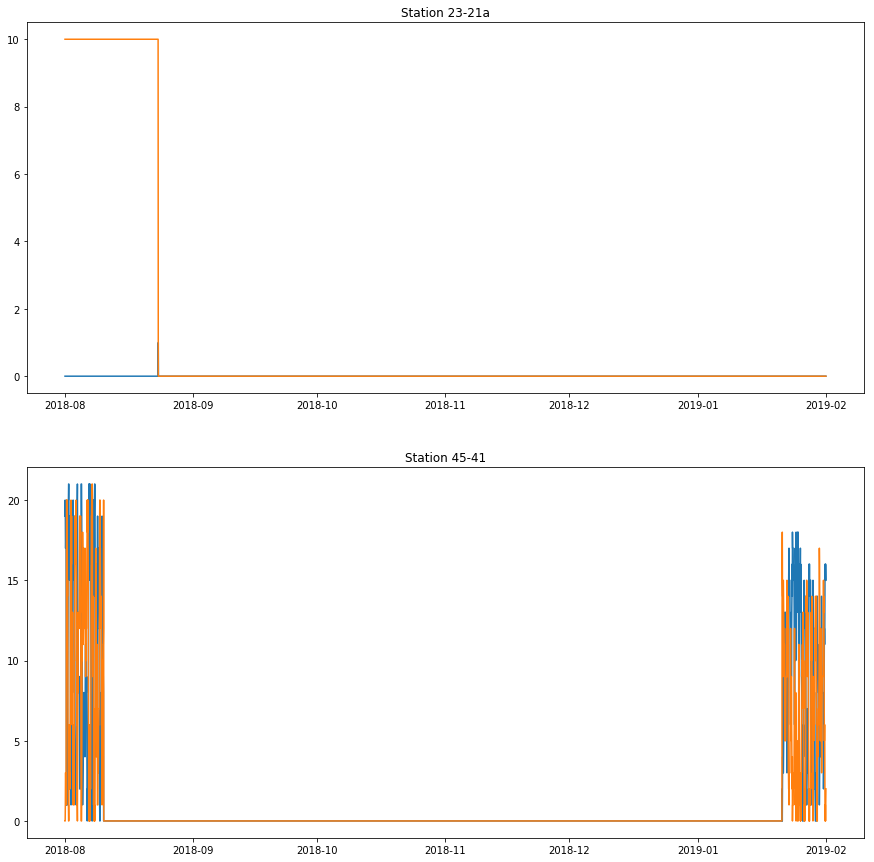

<Figure size 1440x360 with 0 Axes>

In [30]:
#Plot the times-series of such stations

fig, axs = plt.subplots(2,1)
plt.figure(figsize=(20,5))
fig.set_figheight(15)
fig.set_figwidth(15)

X = df_NOT_NAN['Date']
y1 = df_NOT_NAN['23-21a_dock_bikes']
y2 = df_NOT_NAN['23-21a_free_bases']
y3 = df_NOT_NAN['45-41_dock_bikes']
y4 = df_NOT_NAN['45-41_free_bases']

axs[0].title.set_text('Station 23-21a')
axs[1].title.set_text('Station 45-41')

axs[0].plot(X, y1)
axs[0].plot(X, y2)
axs[1].plot(X, y3)
axs[1].plot(X, y4);

#### As it is seen in the graph:

- The station Station 23-21a have not been working during the recording data time.
- And the station Station 45-41 have not been working during the most of the recording data time.


### It is decided to get rid of these stations, the functions have to me modified then:

#### The function *make_dataset()* has to be modified accordingly: adding the modification:

```python
if station_id in ['23-21a', '24-21b', '37-33', '45-41']:
    pass
```
So the stations will not be added

In [31]:
#Let's modify the function make_dataset

def make_dataset(df, value, verbose=True):
    '''Make a times-series flat dataset with one type of data (value) of the dictionary.
        i.e. date vs activation of the station'''
    
    df_aux = df.copy()
    
    list_stations = df_aux['stations'][0]
    
    for j, station in enumerate(list_stations):
        
        if verbose:
            if j == 0:
                verbose_fun(j+1, len(list_stations), first=True, last=False)
            elif j+1 == len(list_stations):
                verbose_fun(j+1, len(list_stations), first=False, last=True)
            else:
                verbose_fun(j+1, len(list_stations), first=False, last=False)
        
        
        station_id = str(station['id']) + '-' + station['number']
        
        if station_id in ['23-21a', '24-21b', '37-33', '45-41']:
            pass
        else:
            df_aux[station_id + '_' + value] = df['stations'].map(lambda x : x[j][value])

    df_aux.drop('stations', axis=1, inplace=True)
    
    return df_aux

#### The function *make_dataset_by_postal_code()* has to be modified accordingly: adding the modification:

We have added the new conditions:

```python
if column_name in ['23-21a', '24-21b', '37-33', '45-41']:
    pass
```
So the stations will not be added the dataset by grouped by postal code

In [32]:
#Let's modify the function make_dataset_by_postal_code

def make_dataset_by_postal_code(df, value, postal_codes_dict, verbose=False):
    '''Make a times-series flat dataset with one type of data (value) of the dictionary.
        i.e. date vs activation of the station'''
    
    df_aux = df.copy()
    
    list_stations = df_aux['stations'][0]
    
    for j, station in enumerate(list_stations):
        
        if verbose:
            if j == 0:
                verbose_fun(j+1, len(list_stations), first=True, last=False)
            elif j+1 == len(list_stations):
                verbose_fun(j+1, len(list_stations), first=False, last=True)
            else:
                verbose_fun(j+1, len(list_stations), first=False, last=False)
        
        
        station_id = str(station['id']) + '-' + station['number']
    
        for postal_code in postal_codes_dict:

            if station_id in postal_codes_dict[postal_code]:
                column_name = postal_code + '_' + value
                if column_name in ['23-21a', '24-21b', '37-33', '45-41']:
                    pass
                elif column_name not in df_aux.columns:
                    df_aux[column_name] = df['stations'].map(lambda x : x[j][value])
                    break
                else:
                    df_aux[column_name] = df_aux[column_name] + df['stations'].map(lambda x : x[j][value])
                    break

    df_aux.drop('stations', axis=1, inplace=True)
    
    return df_aux

#### Moreover, *'no_available'* is confirmed to be that the station is not working, then the occupation_rate will be 0 for such dates and stations.

*Kindly note that the occupation_rate will be explained in the point 6, but in order to have a better understading of the code we will modify the function in this point.*

#### For the both functions we have added the following function instead of the lambda function that returned just the value of the dictionary:

```python
def no_available(x, j):
    if x[j]['no_available'] = 0:
        return x[j][value]
    else:
        return 0
```

In [33]:
#Let's modify the function make_dataset

def make_dataset(df, value, verbose=True):
    '''Make a times-series flat dataset with one type of data (value) of the dictionary.
        i.e. date vs activation of the station'''
    
    def no_available(x):
        if x[j]['no_available'] == 0:
            return x[j][value]
        else:
            return 0
    
    df_aux = df.copy()
    
    list_stations = df_aux['stations'][0]
    
    for j, station in enumerate(list_stations):
        
        if verbose:
            if j == 0:
                verbose_fun(j+1, len(list_stations), first=True, last=False)
            elif j+1 == len(list_stations):
                verbose_fun(j+1, len(list_stations), first=False, last=True)
            else:
                verbose_fun(j+1, len(list_stations), first=False, last=False)
        
        
        station_id = str(station['id']) + '-' + station['number']
        
        if station_id in ['23-21a', '24-21b', '37-33', '45-41']:
            pass
        else:
            df_aux[station_id + '_' + value] = df['stations'].map(no_available)

    df_aux.drop('stations', axis=1, inplace=True)
    
    return df_aux

In [34]:
list_files = os.listdir(data_path)
list_files = [x for x in list_files if 'Bicimad' in x]
list_files

['Bicimad_Estacions_201810.json',
 'Bicimad_Stations_201901.json',
 'Bicimad_Estacions_201808.json',
 'Bicimad_Stations_201812.json',
 'Bicimad_Estacions_201809.json',
 'Bicimad_Stations_201811.json']

In [35]:
path_aux = os.path.join(data_path, list_files[0])

In [36]:
df_aux = pd.read_json(path_aux, lines=True)
df_aux.head()

_id                                           stations
0  2018-10-01T00:42:39.607459  [{'activate': 1, 'name': 'Puerta del Sol A', '...
1  2018-10-01T01:42:45.739061  [{'activate': 1, 'name': 'Puerta del Sol A', '...
2  2018-10-01T02:42:46.913590  [{'activate': 1, 'name': 'Puerta del Sol A', '...
3  2018-10-01T03:42:48.402369  [{'activate': 1, 'name': 'Puerta del Sol A', '...
4  2018-10-01T04:42:50.761414  [{'activate': 1, 'name': 'Puerta del Sol A', '...

In [37]:
#Check the cunction
make_dataset(df_aux, 'dock_bikes', verbose=False)

_id  1-1a_dock_bikes  2-1b_dock_bikes  3-2_dock_bikes  4-3_dock_bikes  5-4_dock_bikes  6-5_dock_bikes  7-6_dock_bikes  8-7_dock_bikes  9-8_dock_bikes  10-9_dock_bikes  11-10_dock_bikes  12-11_dock_bikes  13-12_dock_bikes  14-13_dock_bikes  15-14_dock_bikes  16-15_dock_bikes  17-16_dock_bikes  18-17_dock_bikes  19-18_dock_bikes  20-19_dock_bikes  21-20a_dock_bikes  25-22_dock_bikes  26-23_dock_bikes  27-24_dock_bikes  28-25a_dock_bikes  29-25b_dock_bikes  30-26_dock_bikes  31-27_dock_bikes  32-28_dock_bikes  33-29_dock_bikes  34-30_dock_bikes  35-31_dock_bikes  36-32_dock_bikes  38-34_dock_bikes  39-35_dock_bikes  40-36_dock_bikes  41-37_dock_bikes  42-38_dock_bikes  43-39_dock_bikes  44-40_dock_bikes  46-42_dock_bikes  47-43_dock_bikes  48-44_dock_bikes  49-45_dock_bikes  50-46_dock_bikes  51-47_dock_bikes  52-48_dock_bikes  53-49_dock_bikes  54-50_dock_bikes  55-51_dock_bikes  56-52_dock_bikes  57-53_dock_bikes  58-54_dock_bikes  59-55_dock_bikes  60-56_dock_bikes  61-57_dock_bikes  62-58_dock_bikes  63-59_dock_bikes  64-60_dock_bikes  65-61_dock_bikes  66-62_dock_bikes  67-63_dock_bikes  69-65_dock_bikes  71-67_dock_bikes  72-68_dock_bikes  73-69_dock_bikes  74-70_dock_bikes  75-71_dock_bikes  76-72_dock_bikes  77-73_dock_bikes  78-74_dock_bikes  79-75_dock_bikes  80-76_dock_bikes  81-77_dock_bikes  82-78_dock_bikes  83-79_dock_bikes  84-80a_dock_bikes  85-80b_dock_bikes  86-81_dock_bikes  87-82_dock_bikes  88-83_dock_bikes  89-84_dock_bikes  90-85_dock_bikes  91-86_dock_bikes  92-87_dock_bikes  93-88_dock_bikes  94-89_dock_bikes  95-90_dock_bikes  96-91_dock_bikes  97-92_dock_bikes  98-93_dock_bikes  99-94_dock_bikes  100-95_dock_bikes  101-96_dock_bikes  102-97_dock_bikes  103-98_dock_bikes  104-99_dock_bikes  105-100_dock_bikes  106-101_dock_bikes  107-102_dock_bikes  108-103_dock_bikes  109-104_dock_bikes  110-105_dock_bikes  111-106a_dock_bikes  112-106b_dock_bikes  113-107_dock_bikes  114-108_dock_bikes  115-109_dock_bikes  116-110_dock_bikes  117-111a_dock_bikes  118-111b_dock_bikes  119-112_dock_bikes  120-113_dock_bikes  121-114_dock_bikes  122-115_dock_bikes  123-116a_dock_bikes  124-116b_dock_bikes  125-117_dock_bikes  126-118_dock_bikes  127-119_dock_bikes  128-120_dock_bikes  129-121_dock_bikes  130-122_dock_bikes  131-123_dock_bikes  169-124_dock_bikes  164-125_dock_bikes  163-126_dock_bikes  168-127_dock_bikes  160-128_dock_bikes  161-129_dock_bikes  157-130_dock_bikes  156-131_dock_bikes  149-132_dock_bikes  150-133_dock_bikes  153-134_dock_bikes  158-135_dock_bikes  151-136_dock_bikes  152-137_dock_bikes  154-138_dock_bikes  159-139_dock_bikes  162-140_dock_bikes  165-141_dock_bikes  167-142_dock_bikes  166-143_dock_bikes  170-144_dock_bikes  171-145_dock_bikes  155-146_dock_bikes  148-147_dock_bikes  144-148_dock_bikes  146-149_dock_bikes  147-150_dock_bikes  145-151_dock_bikes  142-152_dock_bikes  143-153_dock_bikes  141-154_dock_bikes  139-155_dock_bikes  140-156_dock_bikes  137-157_dock_bikes  138-158_dock_bikes  173-159_dock_bikes  172-160_dock_bikes  132-161_dock_bikes  133-162_dock_bikes  134-163_dock_bikes  136-164_dock_bikes  135-165_dock_bikes  174-166_dock_bikes  175-167_dock_bikes
0    2018-10-01T00:42:39.607459                8                4               0               3               6              10               8              10               1                9                 3                 5                 1                13                12                 6                 6                 1                 0                 1                  1                 0                 1                 3                 13                 12                 1                 4                 1                 2                 1                 5                11                14                14                 3                22                15                16                22                14                 3                11                13                13    

In [38]:
#Let's modify the function make_dataset_by_postal_code

def make_dataset_by_postal_code(df, value, postal_codes_dict, verbose=False):
    '''Make a times-series flat dataset with one type of data (value) of the dictionary.
        i.e. date vs activation of the station'''
    
    df_aux = df.copy()
    
    def no_available(x):
        if x[j]['no_available'] == 0:
            return x[j][value]
        else:
            return 0
    
    
    list_stations = df_aux['stations'][0]
    
    for j, station in enumerate(list_stations):
        
        if verbose:
            if j == 0:
                verbose_fun(j+1, len(list_stations), first=True, last=False)
            elif j+1 == len(list_stations):
                verbose_fun(j+1, len(list_stations), first=False, last=True)
            else:
                verbose_fun(j+1, len(list_stations), first=False, last=False)
        
        
        station_id = str(station['id']) + '-' + station['number']
    
        for postal_code in postal_codes_dict:

            if station_id in postal_codes_dict[postal_code]:
                column_name = postal_code + '_' + value
                if column_name in ['23-21a', '24-21b', '37-33', '45-41']:
                    pass
                elif column_name not in df_aux.columns:
                    df_aux[column_name] = df['stations'].map(no_available)
                    break
                else:
                    df_aux[column_name] = df_aux[column_name] + df['stations'].map(no_available)
                    break

    df_aux.drop('stations', axis=1, inplace=True)
    
    return df_aux

In [39]:
postal_codes_dict = pre.load_dict_from_file(data_path)

In [40]:
make_dataset_by_postal_code(df_aux, 'dock_bikes', postal_codes_dict, verbose=False)

_id  28013_dock_bikes  28004_dock_bikes  28015_dock_bikes  28005_dock_bikes  28008_dock_bikes  28014_dock_bikes  28012_dock_bikes  28001_dock_bikes  28009_dock_bikes  28007_dock_bikes  28006_dock_bikes  28046_dock_bikes  28045_dock_bikes  28010_dock_bikes  28003_dock_bikes  28020_dock_bikes  28002_dock_bikes  28036_dock_bikes  28016_dock_bikes
0    2018-10-01T00:42:39.607459                54                91                58               157               108                72               124                84               205               108               117                52                92                42                98                88                46                29                20
1    2018-10-01T01:42:45.739061                45               103                59               158               110                62               119                72               215               110               122                47                94                37               103                92                46                30                19
2    2018-10-01T02:42:46.913590                70               105                58               160               113                64               127                61               213               116               107                48                89                48               107                91                47                30                19
3    2018-10-01T03:42:48.402369                62               103                62               163               110                66               123                49               216               139               103                48                87                49               109                91                47                29                20
4    2018-10-01T04:42:50.761414                53               103                63               165               108                48               149                48               219               140                99                49                89                50               109                92                47                29                20
5    2018-10-01T05:42:52.848612                51               108                63               160               108                46               164                45               221               145               100                50                93                51               112                80                46                34                20
6    2018-10-01T06:42:56.809070                49               112                63               153               109                49               160                48               208               146               102                54                91                50               116                76                45                23                20
7    2018-10-01T07:42:57.992479                50               107                52               146               110                36               155                52               196               141               104                47                88                44               107                82                41                21                23
8    2018-10-01T08:43:01.473502                67                99                22               101               114                63               105               106               143                97               127                64                63                31                89                62                45                21                21
9    2018-10-01T09:43:03.690073                87                88                18                50               100               126                37               199               108                38               159               123                79                28     

#### Kindly note that such modifications are added to new library called: *preprocessing_v2.py* in order to keep working on the EDA

In [41]:
import preprocessing_v2 as pre2

### Conclusions point 2. No_available :

- #### *'no_available'* is confirmed to be that the station is not working, then the occupation_rate will be 0 for such dates.

- #### The stations: 23-21a, 24-21b, 37-33 and 45-41 are remove from the dataset, since they have not been working during the data recording time.

- #### The functions have been modified accordingly  and the library preprocessing_v2 will be used below.

## 3. total_bases, dock_bikes, free_bases

In [42]:
#Load the datasets
df_total_bases = pre2.make_all_dataset(data_path, 'total_bases')
df_dock_bikes = pre2.make_all_dataset(data_path, 'dock_bikes')
df_free_bases = pre2.make_all_dataset(data_path, 'free_bases')

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet
0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%-

#### The data should comply with: *total_bases = dock_bikes + free_bases*

Therefore, **dock_bikes + free_bases - total_bases**, should be 0

In [43]:
#Let's make the array for making such operations
np_diff = df_dock_bikes[df_dock_bikes.columns[1:]].values + df_free_bases[df_free_bases.columns[1:]].values - df_total_bases[df_total_bases.columns[1:]].values

In [44]:
#Let's calculate the differences
df_diff_slots = pd.DataFrame(np_diff)
df_diff_slots.sample(5)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167
1435   -1    0   -2    0    0    0    0   -2    0   -2   -2    0   -2   -1    0   -2    0   -5   -3   -2   -1   -3   -5   -1   -1   -2   -3   -3   -4    0   -3   -1   -2   -2    0   -1    0    0   -2   -1   -4   -1    0   -1    0   -1   -4   -1   -3   -2   -4    0   -1   -2   -2    0   -2   -4    0   -1    0   -1   -2    0    0    0   -1   -1   -3    0   -2    0    0    0   -2   -1    0   -1   -2    0   -2   -1    0   -1   -1    0   -2   -2   -2    0   -1   -1    0   -2    0   -1   -1    0   -2   -1    0    0   -1    0    0   -2   -1    0   -1    0    0   -1   -2   -3    0   -2    0    0    0   -1    0    0    0   -1   -4   -1   -1    0   -1   -3   -3   -1   -1   -1   -1   -1   -1    0   -5   -1    0    0    0   -2    0    0    0   -2   -1   -1    0   -1   -3    0    0    0    0    0   -2    0   -2    0    0    0    0    0   -1    0
4195    0    0   -2   -1    0   -1   -1   -2    0    0   -1    0   -1   -1    0   -1    0    0    0   -1    0   -1   -2    0   -1    0   -2   -2   -3   -2   -1    0   -1   -2    0   -1   -2   -1   -1   -1   -1   -2    0   -1    0   -4   -2   -1   -4   -6    0   -3    0    0    0   -4    0    0    0   -2    0    0    0   -3   -1   -1   -1    0   -2   -1   -2    0    0   -1    0    0   -1   -1   -1    0    0   -1   -3   -1   -4    0   -3    0   -2   -2   -1   -1    0   -3   -2    0    0   -1   -2   -2   -2   -1    0    0   -1    0   -3   -3    0    0   -1    0   -4   -2    0   -1    0    0   -2   -1    0    0    0   -3   -4   -1   -1   -1   -3   -1    0   -1   -4   -4   -1   -1    0    0    0    0    0   -1   -1    0    0    0   -1   -2    0    0    0    0    0    0   -2   -1   -2    0   -1    0    0    0    0    0    0    0    0    0
3837    0    0    0    0   -3   -1    0   -6    0    0    0   -2   -1   -1    0    0   -3   -3   -4    0   -1    0    0    0   -1    0   -1   -3   -4   -3    0   -1    0   -1    0    0   -2   -1    0    0   -6   -4    0   -2   -1   -2   -1   -2   -6   -1   -1   -1   -2   -2   -1   -2   -1   -2   -2    0    0   -1   -1   -2   -1   -2   -1    0   -1   -3   -1    0    0    0   -1   -1   -5   -4   -5   -1    0   -1    0   -2   -2   -2   -2   -2   -1   -3   -2    0    0   -1   -1   -3    0    0   -3   -1   -1   -1    0   -1    0    0   -5   -2   -1   -1    0    0   -2    0   -1    0    0   -4    0   -1    0   -2   -1   -1   -2    0   -3   -1   -1    0   -3    0   -3   -4    0    0    0    0    0    0   -2    0    0   -1   -2    0    0   -1   -1    0    0    0   -2   -1    0    0   -4   -1    0    0   -1   -5   -3   -2   -1   -1   -1   -3
730    -2   -1   -1    0    0    0    0   -1   -2    0    0    0   -1    0    0    0    0   -1   -1    0    0   -2    0   -1   -1   -1   -2   -3   -3    0   -1   -1   -1   -1    0    0    0   -4    0    0   -2    0   -2   -1   -1    0    0   -2    0   -1   -2   -2    0   -4    0    0    0   -3   -1   -1    0   -3   -1    0    0    0    0   -1   -1   -1   -2    0    0    0   -1    0    0    0    0   -1    0   -1   -2   -1    0    0    0    0   -1   -2   -1    0    0   -2    0    0   -1    0    0    0    0   -1   -1    0    0    0   -2   -1   -1   -1   -1    0   -3    0    0    0    0   -1    0   -1   -3   -3    0    0  

#### Let's see the heatmap of this dataframe in order to see what is going on

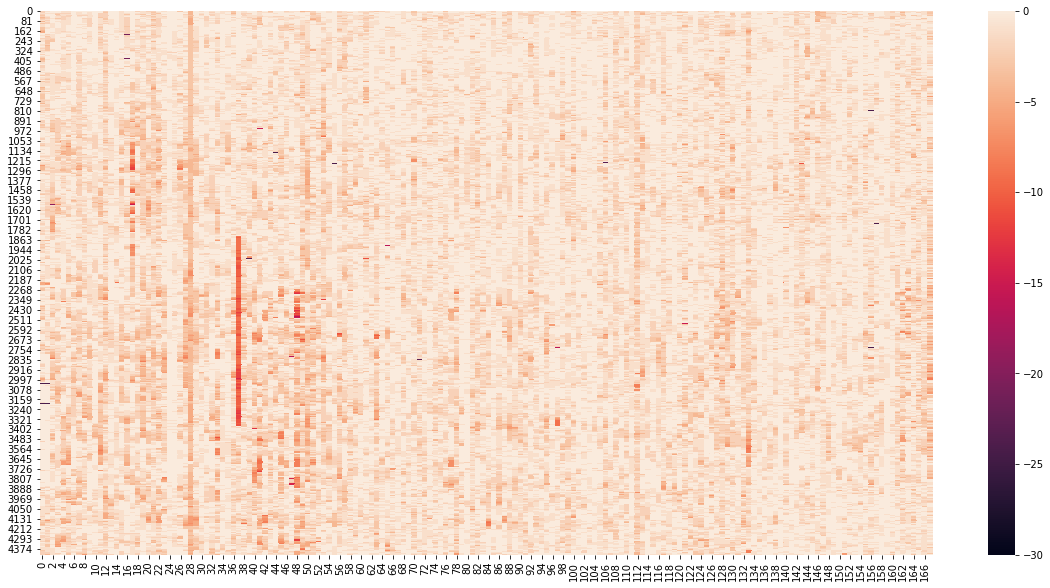

In [45]:
#Plot the result
plt.figure(figsize=(20,10))
sns.heatmap(df_diff_slots)
plt.show()

#### Why there are more total bases than dock bikes and free bases?

Could the difference be the reservations?

In [46]:
#Load the dataset
df_reservations_count = pre2.make_all_dataset(data_path, 'reservations_count')

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet


In [47]:
#Let's see
df_reservations_count.head(5)

Date  1-1a_reservations_count  2-1b_reservations_count  3-2_reservations_count  4-3_reservations_count  5-4_reservations_count  6-5_reservations_count  7-6_reservations_count  8-7_reservations_count  9-8_reservations_count  10-9_reservations_count  11-10_reservations_count  12-11_reservations_count  13-12_reservations_count  14-13_reservations_count  15-14_reservations_count  16-15_reservations_count  17-16_reservations_count  18-17_reservations_count  19-18_reservations_count  20-19_reservations_count  21-20a_reservations_count  25-22_reservations_count  26-23_reservations_count  27-24_reservations_count  28-25a_reservations_count  29-25b_reservations_count  30-26_reservations_count  31-27_reservations_count  32-28_reservations_count  33-29_reservations_count  34-30_reservations_count  35-31_reservations_count  36-32_reservations_count  38-34_reservations_count  39-35_reservations_count  40-36_reservations_count  41-37_reservations_count  42-38_reservations_count  43-39_reservations_count  44-40_reservations_count  46-42_reservations_count  47-43_reservations_count  48-44_reservations_count  49-45_reservations_count  50-46_reservations_count  51-47_reservations_count  52-48_reservations_count  53-49_reservations_count  54-50_reservations_count  55-51_reservations_count  56-52_reservations_count  57-53_reservations_count  58-54_reservations_count  59-55_reservations_count  60-56_reservations_count  61-57_reservations_count  62-58_reservations_count  63-59_reservations_count  64-60_reservations_count  65-61_reservations_count  66-62_reservations_count  67-63_reservations_count  69-65_reservations_count  71-67_reservations_count  72-68_reservations_count  73-69_reservations_count  74-70_reservations_count  75-71_reservations_count  76-72_reservations_count  77-73_reservations_count  78-74_reservations_count  79-75_reservations_count  80-76_reservations_count  81-77_reservations_count  82-78_reservations_count  83-79_reservations_count  84-80a_reservations_count  85-80b_reservations_count  86-81_reservations_count  87-82_reservations_count  88-83_reservations_count  89-84_reservations_count  90-85_reservations_count  91-86_reservations_count  92-87_reservations_count  93-88_reservations_count  94-89_reservations_count  95-90_reservations_count  96-91_reservations_count  97-92_reservations_count  98-93_reservations_count  99-94_reservations_count  100-95_reservations_count  101-96_reservations_count  102-97_reservations_count  103-98_reservations_count  104-99_reservations_count  105-100_reservations_count  106-101_reservations_count  107-102_reservations_count  108-103_reservations_count  109-104_reservations_count  110-105_reservations_count  111-106a_reservations_count  112-106b_reservations_count  113-107_reservations_count  114-108_reservations_count  115-109_reservations_count  116-110_reservations_count  117-111a_reservations_count  118-111b_reservations_count  119-112_reservations_count  120-113_reservations_count  121-114_reservations_count  122-115_reservations_count  123-116a_reservations_count  124-116b_reservations_count  125-117_reservations_count  126-118_reservations_count  127-119_reservations_count  128-120_reservations_count  129-121_reservations_count  130-122_reservations_count  131-123_reservations_count  169-124_reservations_count  164-125_reservations_count  163-126_reservations_count  168-127_reservations_count  160-128_reservations_count  161-129_reservations_count  157-130_reservations_count  156-131_reservations_count  149-132_reservations_count  150-133_reservations_count  153-134_reservations_count  158-135_reservations_count  151-136_reservations_count  152-137_reservations_count  154-138_reservations_count  159-139_reservations_count  162-140_reservations_count  165-141_reservations_count  167-142_reservations_count  166-143_reservations_count  170-144_reservations_count  171-145_reservations_count  155-146_reservations_count  148-147_reservations_count  144-148_reservations_count  146-149_reservati

In [48]:
#Convert into array and add to the differences
np_diff_w_reserv = np_diff + df_reservations_count[df_reservations_count.columns[1:]].values

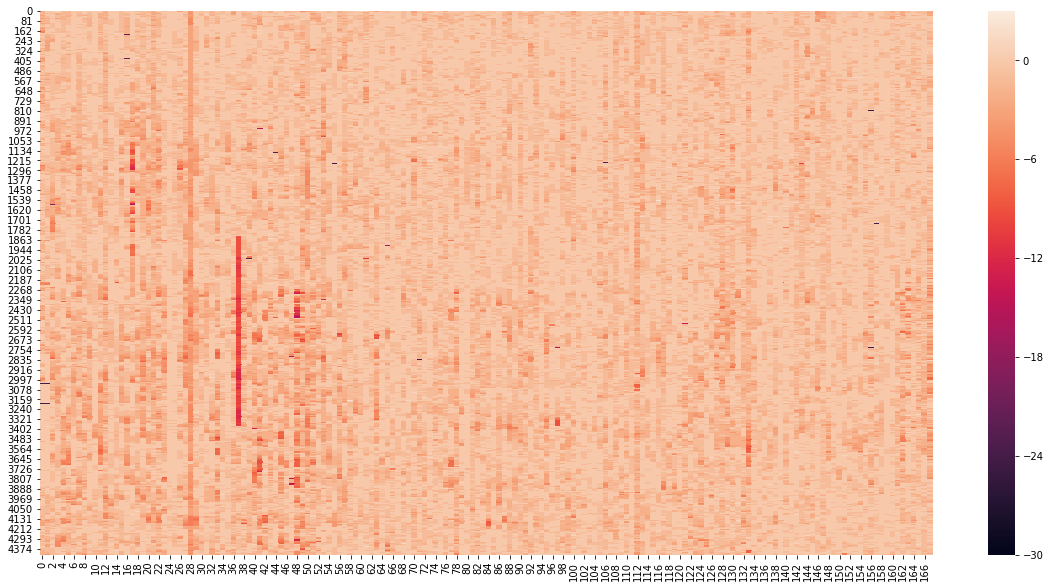

In [49]:
#Plot the result

plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(np_diff_w_reserv))
plt.show()

#### As we do not really understand why there are bases that are not working for some time, we will assume that such bases are desactivated or broken, therefore we will change the total bases with the real total bases that are available.

total_bases_updated = dock_bikes + free_bases

In [50]:
#Let's define the function

def total_bases_dataset(data_path, by_postal_code=True):
    df_dock_bikes_pc = make_all_dataset(data_path, 'dock_bikes', by_postal_code=by_postal_code, verbose=False)
    df_free_bases_pc = make_all_dataset(data_path, 'free_bases', by_postal_code=by_postal_code, verbose=False)
    np_total_bases = df_dock_bikes_pc[df_dock_bikes_pc.columns[1:]].values + df_free_bases_pc[df_free_bases_pc.columns[1:]].values
    total_bases = pd.DataFrame(np_total_bases)
    columns = list(map(lambda x: x.split("_")[0] + "_" + "total_bases", df_dock_bikes_pc.columns[1:]))
    total_bases.columns = columns
    columns = ['Date'] + columns
    total_bases['Date'] = df_free_bases_pc['Date']
    total_bases = total_bases[columns]
    return total_bases

In [51]:
#Library
import importlib

In [52]:
#Reload the library for the first time we have added total_bases_dataset to the library preprocessing_v2
importlib.reload(pre2)

<module 'preprocessing_v2' from '/home/gonzalo/Repos/TFM/02-EDA/preprocessing_v2.py'>

In [53]:
pre2.total_bases_dataset(data_path, by_postal_code=True)

Date  28013_total_bases  28004_total_bases  28015_total_bases  28005_total_bases  28008_total_bases  28014_total_bases  28012_total_bases  28001_total_bases  28009_total_bases  28007_total_bases  28006_total_bases  28046_total_bases  28045_total_bases  28010_total_bases  28003_total_bases  28020_total_bases  28002_total_bases  28036_total_bases  28016_total_bases
0    2018-08-01 00:58:00                263                367                220                225                231                230                332                271                361                214                212                173                138                 95                162                163                 85                 70                 23
1    2018-08-01 01:58:00                263                368                221                225                233                230                333                273                361                214                212                173                141                 95                162                165                 84                 70                 22
2    2018-08-01 02:58:00                263                368                220                225                233                231                333                273                363                213                212                173                140                 94                163                166                 84                 70                 22
3    2018-08-01 03:58:00                261                368                221                226                233                232                331                273                363                213                211                173                140                 95                163                166                 84                 70                 22
4    2018-08-01 04:58:00                262                368                221                226                233                231                332                273                363                213                211                173                140                 95                163                166                 84                 70                 22
5    2018-08-01 05:58:00                263                368                221                226                233                232                333                274                363                213                209                173                140                 95                163                166                 84                 70                 22
6    2018-08-01 06:58:00                263                368                221                226                233                232                333                274                362                212                211                173                140                 95                163                166                 83                 70                 21
7    2018-08-01 07:58:00                261                367                220                223                230                229                334                273                362                211                203                171                139                 93                163                163                 82                 70                 22
8    2018-08-01 08:58:00                262                368                220                245                232                227                334                270                383                213                207                171                139                 94                162                161                 80                 71                 21
9    2018-08-01 09:58:00                264                368                220                246                229                229                342   

In [54]:
#Check if the modifications work
pre2.total_bases_dataset(data_path, by_postal_code=False)

Date  1-1a_total_bases  2-1b_total_bases  3-2_total_bases  4-3_total_bases  5-4_total_bases  6-5_total_bases  7-6_total_bases  8-7_total_bases  9-8_total_bases  10-9_total_bases  11-10_total_bases  12-11_total_bases  13-12_total_bases  14-13_total_bases  15-14_total_bases  16-15_total_bases  17-16_total_bases  18-17_total_bases  19-18_total_bases  20-19_total_bases  21-20a_total_bases  25-22_total_bases  26-23_total_bases  27-24_total_bases  28-25a_total_bases  29-25b_total_bases  30-26_total_bases  31-27_total_bases  32-28_total_bases  33-29_total_bases  34-30_total_bases  35-31_total_bases  36-32_total_bases  38-34_total_bases  39-35_total_bases  40-36_total_bases  41-37_total_bases  42-38_total_bases  43-39_total_bases  44-40_total_bases  46-42_total_bases  47-43_total_bases  48-44_total_bases  49-45_total_bases  50-46_total_bases  51-47_total_bases  52-48_total_bases  53-49_total_bases  54-50_total_bases  55-51_total_bases  56-52_total_bases  57-53_total_bases  58-54_total_bases  59-55_total_bases  60-56_total_bases  61-57_total_bases  62-58_total_bases  63-59_total_bases  64-60_total_bases  65-61_total_bases  66-62_total_bases  67-63_total_bases  69-65_total_bases  71-67_total_bases  72-68_total_bases  73-69_total_bases  74-70_total_bases  75-71_total_bases  76-72_total_bases  77-73_total_bases  78-74_total_bases  79-75_total_bases  80-76_total_bases  81-77_total_bases  82-78_total_bases  83-79_total_bases  84-80a_total_bases  85-80b_total_bases  86-81_total_bases  87-82_total_bases  88-83_total_bases  89-84_total_bases  90-85_total_bases  91-86_total_bases  92-87_total_bases  93-88_total_bases  94-89_total_bases  95-90_total_bases  96-91_total_bases  97-92_total_bases  98-93_total_bases  99-94_total_bases  100-95_total_bases  101-96_total_bases  102-97_total_bases  103-98_total_bases  104-99_total_bases  105-100_total_bases  106-101_total_bases  107-102_total_bases  108-103_total_bases  109-104_total_bases  110-105_total_bases  111-106a_total_bases  112-106b_total_bases  113-107_total_bases  114-108_total_bases  115-109_total_bases  116-110_total_bases  117-111a_total_bases  118-111b_total_bases  119-112_total_bases  120-113_total_bases  121-114_total_bases  122-115_total_bases  123-116a_total_bases  124-116b_total_bases  125-117_total_bases  126-118_total_bases  127-119_total_bases  128-120_total_bases  129-121_total_bases  130-122_total_bases  131-123_total_bases  169-124_total_bases  164-125_total_bases  163-126_total_bases  168-127_total_bases  160-128_total_bases  161-129_total_bases  157-130_total_bases  156-131_total_bases  149-132_total_bases  150-133_total_bases  153-134_total_bases  158-135_total_bases  151-136_total_bases  152-137_total_bases  154-138_total_bases  159-139_total_bases  162-140_total_bases  165-141_total_bases  167-142_total_bases  166-143_total_bases  170-144_total_bases  171-145_total_bases  155-146_total_bases  148-147_total_bases  144-148_total_bases  146-149_total_bases  147-150_total_bases  145-151_total_bases  142-152_total_bases  143-153_total_bases  141-154_total_bases  139-155_total_bases  140-156_total_bases  137-157_total_bases  138-158_total_bases  173-159_total_bases  172-160_total_bases  132-161_total_bases  133-162_total_bases  134-163_total_bases  136-164_total_bases  135-165_total_bases  174-166_total_bases  175-167_total_bases
0    2018-08-01 00:58:00                22                24               24               18               23               26               24               21               24                24                 24                 24                 22                 23                 24                 20                 21                 24                 22                 23                  27                 22                 24                 23                  24                  24                 21                 24                 20                 24                 26                 27                 17                 23      

### Conclusions point 3. total_bases, dock_bikes, free_bases :

- #### As it is seen above, the *total_bases* does not comply with the sum of *dock_bikes* and *free_bases*, therefore it has been decided to modify the total_bases, with a new function, that provides the *total_bases* as the sum of free_bases and dock_bikes. With this way, we it is taken into account the bases that are not working for unknown reasons.

## 4. Reservations_count

In [55]:
#Load the data
df_reservations_count.head()

Date  1-1a_reservations_count  2-1b_reservations_count  3-2_reservations_count  4-3_reservations_count  5-4_reservations_count  6-5_reservations_count  7-6_reservations_count  8-7_reservations_count  9-8_reservations_count  10-9_reservations_count  11-10_reservations_count  12-11_reservations_count  13-12_reservations_count  14-13_reservations_count  15-14_reservations_count  16-15_reservations_count  17-16_reservations_count  18-17_reservations_count  19-18_reservations_count  20-19_reservations_count  21-20a_reservations_count  25-22_reservations_count  26-23_reservations_count  27-24_reservations_count  28-25a_reservations_count  29-25b_reservations_count  30-26_reservations_count  31-27_reservations_count  32-28_reservations_count  33-29_reservations_count  34-30_reservations_count  35-31_reservations_count  36-32_reservations_count  38-34_reservations_count  39-35_reservations_count  40-36_reservations_count  41-37_reservations_count  42-38_reservations_count  43-39_reservations_count  44-40_reservations_count  46-42_reservations_count  47-43_reservations_count  48-44_reservations_count  49-45_reservations_count  50-46_reservations_count  51-47_reservations_count  52-48_reservations_count  53-49_reservations_count  54-50_reservations_count  55-51_reservations_count  56-52_reservations_count  57-53_reservations_count  58-54_reservations_count  59-55_reservations_count  60-56_reservations_count  61-57_reservations_count  62-58_reservations_count  63-59_reservations_count  64-60_reservations_count  65-61_reservations_count  66-62_reservations_count  67-63_reservations_count  69-65_reservations_count  71-67_reservations_count  72-68_reservations_count  73-69_reservations_count  74-70_reservations_count  75-71_reservations_count  76-72_reservations_count  77-73_reservations_count  78-74_reservations_count  79-75_reservations_count  80-76_reservations_count  81-77_reservations_count  82-78_reservations_count  83-79_reservations_count  84-80a_reservations_count  85-80b_reservations_count  86-81_reservations_count  87-82_reservations_count  88-83_reservations_count  89-84_reservations_count  90-85_reservations_count  91-86_reservations_count  92-87_reservations_count  93-88_reservations_count  94-89_reservations_count  95-90_reservations_count  96-91_reservations_count  97-92_reservations_count  98-93_reservations_count  99-94_reservations_count  100-95_reservations_count  101-96_reservations_count  102-97_reservations_count  103-98_reservations_count  104-99_reservations_count  105-100_reservations_count  106-101_reservations_count  107-102_reservations_count  108-103_reservations_count  109-104_reservations_count  110-105_reservations_count  111-106a_reservations_count  112-106b_reservations_count  113-107_reservations_count  114-108_reservations_count  115-109_reservations_count  116-110_reservations_count  117-111a_reservations_count  118-111b_reservations_count  119-112_reservations_count  120-113_reservations_count  121-114_reservations_count  122-115_reservations_count  123-116a_reservations_count  124-116b_reservations_count  125-117_reservations_count  126-118_reservations_count  127-119_reservations_count  128-120_reservations_count  129-121_reservations_count  130-122_reservations_count  131-123_reservations_count  169-124_reservations_count  164-125_reservations_count  163-126_reservations_count  168-127_reservations_count  160-128_reservations_count  161-129_reservations_count  157-130_reservations_count  156-131_reservations_count  149-132_reservations_count  150-133_reservations_count  153-134_reservations_count  158-135_reservations_count  151-136_reservations_count  152-137_reservations_count  154-138_reservations_count  159-139_reservations_count  162-140_reservations_count  165-141_reservations_count  167-142_reservations_count  166-143_reservations_count  170-144_reservations_count  171-145_reservations_count  155-146_reservations_count  148-147_reservations_count  144-148_reservations_count  146-149_reservati

In [56]:
#Show the statistics of the dataset
df_reservations_count.describe()

1-1a_reservations_count  2-1b_reservations_count  3-2_reservations_count  4-3_reservations_count  5-4_reservations_count  6-5_reservations_count  7-6_reservations_count  8-7_reservations_count  9-8_reservations_count  10-9_reservations_count  11-10_reservations_count  12-11_reservations_count  13-12_reservations_count  14-13_reservations_count  15-14_reservations_count  16-15_reservations_count  17-16_reservations_count  18-17_reservations_count  19-18_reservations_count  20-19_reservations_count  21-20a_reservations_count  25-22_reservations_count  26-23_reservations_count  27-24_reservations_count  28-25a_reservations_count  29-25b_reservations_count  30-26_reservations_count  31-27_reservations_count  32-28_reservations_count  33-29_reservations_count  34-30_reservations_count  35-31_reservations_count  36-32_reservations_count  38-34_reservations_count  39-35_reservations_count  40-36_reservations_count  41-37_reservations_count  42-38_reservations_count  43-39_reservations_count  44-40_reservations_count  46-42_reservations_count  47-43_reservations_count  48-44_reservations_count  49-45_reservations_count  50-46_reservations_count  51-47_reservations_count  52-48_reservations_count  53-49_reservations_count  54-50_reservations_count  55-51_reservations_count  56-52_reservations_count  57-53_reservations_count  58-54_reservations_count  59-55_reservations_count  60-56_reservations_count  61-57_reservations_count  62-58_reservations_count  63-59_reservations_count  64-60_reservations_count  65-61_reservations_count  66-62_reservations_count  67-63_reservations_count  69-65_reservations_count  71-67_reservations_count  72-68_reservations_count  73-69_reservations_count  74-70_reservations_count  75-71_reservations_count  76-72_reservations_count  77-73_reservations_count  78-74_reservations_count  79-75_reservations_count  80-76_reservations_count  81-77_reservations_count  82-78_reservations_count  83-79_reservations_count  84-80a_reservations_count  85-80b_reservations_count  86-81_reservations_count  87-82_reservations_count  88-83_reservations_count  89-84_reservations_count  90-85_reservations_count  91-86_reservations_count  92-87_reservations_count  93-88_reservations_count  94-89_reservations_count  95-90_reservations_count  96-91_reservations_count  97-92_reservations_count  98-93_reservations_count  99-94_reservations_count  100-95_reservations_count  101-96_reservations_count  102-97_reservations_count  103-98_reservations_count  104-99_reservations_count  105-100_reservations_count  106-101_reservations_count  107-102_reservations_count  108-103_reservations_count  109-104_reservations_count  110-105_reservations_count  111-106a_reservations_count  112-106b_reservations_count  113-107_reservations_count  114-108_reservations_count  115-109_reservations_count  116-110_reservations_count  117-111a_reservations_count  118-111b_reservations_count  119-112_reservations_count  120-113_reservations_count  121-114_reservations_count  122-115_reservations_count  123-116a_reservations_count  124-116b_reservations_count  125-117_reservations_count  126-118_reservations_count  127-119_reservations_count  128-120_reservations_count  129-121_reservations_count  130-122_reservations_count  131-123_reservations_count  169-124_reservations_count  164-125_reservations_count  163-126_reservations_count  168-127_reservations_count  160-128_reservations_count  161-129_reservations_count  157-130_reservations_count  156-131_reservations_count  149-132_reservations_count  150-133_reservations_count  153-134_reservations_count  158-135_reservations_count  151-136_reservations_count  152-137_reservations_count  154-138_reservations_count  159-139_reservations_count  162-140_reservations_count  165-141_reservations_count  167-142_reservations_count  166-143_reservations_count  170-144_reservations_count  171-145_reservations_count  155-146_reservations_count  148-147_reservations_count  144-148_reservations_count  146-149_reservations_co

In [57]:
#Let's see if there are nulls
df_reservations_count.isna().sum().describe()

count    169.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

### Conclusions point 4. Reservations_count:

- #### As it is seen above, the *reservations_count* data is clean, however we can not appreciate if this data will improve our prediction or will not.

## 5. Light

We are going to study if light is related with dock bikes

In [58]:
#load the datasets

df_light = pre2.make_all_dataset(data_path, value='light', by_postal_code=False, verbose=True)
df_dock_bikes = pre2.make_all_dataset(data_path, 'dock_bikes', by_postal_code=False, verbose=True)

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet
0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%-

In [59]:
#Show the head of the dataframe
df_light.head()

Date  1-1a_light  2-1b_light  3-2_light  4-3_light  5-4_light  6-5_light  7-6_light  8-7_light  9-8_light  10-9_light  11-10_light  12-11_light  13-12_light  14-13_light  15-14_light  16-15_light  17-16_light  18-17_light  19-18_light  20-19_light  21-20a_light  25-22_light  26-23_light  27-24_light  28-25a_light  29-25b_light  30-26_light  31-27_light  32-28_light  33-29_light  34-30_light  35-31_light  36-32_light  38-34_light  39-35_light  40-36_light  41-37_light  42-38_light  43-39_light  44-40_light  46-42_light  47-43_light  48-44_light  49-45_light  50-46_light  51-47_light  52-48_light  53-49_light  54-50_light  55-51_light  56-52_light  57-53_light  58-54_light  59-55_light  60-56_light  61-57_light  62-58_light  63-59_light  64-60_light  65-61_light  66-62_light  67-63_light  69-65_light  71-67_light  72-68_light  73-69_light  74-70_light  75-71_light  76-72_light  77-73_light  78-74_light  79-75_light  80-76_light  81-77_light  82-78_light  83-79_light  84-80a_light  85-80b_light  86-81_light  87-82_light  88-83_light  89-84_light  90-85_light  91-86_light  92-87_light  93-88_light  94-89_light  95-90_light  96-91_light  97-92_light  98-93_light  99-94_light  100-95_light  101-96_light  102-97_light  103-98_light  104-99_light  105-100_light  106-101_light  107-102_light  108-103_light  109-104_light  110-105_light  111-106a_light  112-106b_light  113-107_light  114-108_light  115-109_light  116-110_light  117-111a_light  118-111b_light  119-112_light  120-113_light  121-114_light  122-115_light  123-116a_light  124-116b_light  125-117_light  126-118_light  127-119_light  128-120_light  129-121_light  130-122_light  131-123_light  169-124_light  164-125_light  163-126_light  168-127_light  160-128_light  161-129_light  157-130_light  156-131_light  149-132_light  150-133_light  153-134_light  158-135_light  151-136_light  152-137_light  154-138_light  159-139_light  162-140_light  165-141_light  167-142_light  166-143_light  170-144_light  171-145_light  155-146_light  148-147_light  144-148_light  146-149_light  147-150_light  145-151_light  142-152_light  143-153_light  141-154_light  139-155_light  140-156_light  137-157_light  138-158_light  173-159_light  172-160_light  132-161_light  133-162_light  134-163_light  136-164_light  135-165_light  174-166_light  175-167_light
0 2018-08-01 00:58:00           2           2          0          2          0          0          0          0          0           0            0            0            2            2            0            0            2            0            0            0             0            0            0            0             0             0            2            2            0            0            0            0            0            1            2            0            1            0            2            1            1            1            1            1            2            0            2            1            2            0            1            1            0            1            2            2            0            2            0            2            0            2            2            0            2            0            2            1            1            1            2            2            2            1            1            2             0             1            2            1            0            0            2            0            0            2            2            0            1            0            0            2             0             0             2             0             2              0              1              0              0              0              2               0               0              0              2              0              0               2               0              1              0              2              2               2               0              1              2              0              1              1              

In [60]:
##Make the dataset with
df_dock_light = df_light.set_index('Date').join(df_dock_bikes.set_index('Date'))
df_dock_light.head()

1-1a_light  2-1b_light  3-2_light  4-3_light  5-4_light  6-5_light  7-6_light  8-7_light  9-8_light  10-9_light  11-10_light  12-11_light  13-12_light  14-13_light  15-14_light  16-15_light  17-16_light  18-17_light  19-18_light  20-19_light  21-20a_light  25-22_light  26-23_light  27-24_light  28-25a_light  29-25b_light  30-26_light  31-27_light  32-28_light  33-29_light  34-30_light  35-31_light  36-32_light  38-34_light  39-35_light  40-36_light  41-37_light  42-38_light  43-39_light  44-40_light  46-42_light  47-43_light  48-44_light  49-45_light  50-46_light  51-47_light  52-48_light  53-49_light  54-50_light  55-51_light  56-52_light  57-53_light  58-54_light  59-55_light  60-56_light  61-57_light  62-58_light  63-59_light  64-60_light  65-61_light  66-62_light  67-63_light  69-65_light  71-67_light  72-68_light  73-69_light  74-70_light  75-71_light  76-72_light  77-73_light  78-74_light  79-75_light  80-76_light  81-77_light  82-78_light  83-79_light  84-80a_light  85-80b_light  86-81_light  87-82_light  88-83_light  89-84_light  90-85_light  91-86_light  92-87_light  93-88_light  94-89_light  95-90_light  96-91_light  97-92_light  98-93_light  99-94_light  100-95_light  101-96_light  102-97_light  103-98_light  104-99_light  105-100_light  106-101_light  107-102_light  108-103_light  109-104_light  110-105_light  111-106a_light  112-106b_light  113-107_light  114-108_light  115-109_light  116-110_light  117-111a_light  118-111b_light  119-112_light  120-113_light  121-114_light  122-115_light  123-116a_light  124-116b_light  125-117_light  126-118_light  127-119_light  128-120_light  129-121_light  130-122_light  131-123_light  169-124_light  164-125_light  163-126_light  168-127_light  160-128_light  161-129_light  157-130_light  156-131_light  149-132_light  150-133_light  153-134_light  158-135_light  151-136_light  152-137_light  154-138_light  159-139_light  162-140_light  165-141_light  167-142_light  166-143_light  170-144_light  171-145_light  155-146_light  148-147_light  144-148_light  146-149_light  147-150_light  145-151_light  142-152_light  143-153_light  141-154_light  139-155_light  140-156_light  137-157_light  138-158_light  173-159_light  172-160_light  132-161_light  133-162_light  134-163_light  136-164_light  135-165_light  174-166_light  175-167_light  1-1a_dock_bikes  2-1b_dock_bikes  3-2_dock_bikes  4-3_dock_bikes  5-4_dock_bikes  6-5_dock_bikes  7-6_dock_bikes  8-7_dock_bikes  9-8_dock_bikes  10-9_dock_bikes  11-10_dock_bikes  12-11_dock_bikes  13-12_dock_bikes  14-13_dock_bikes  15-14_dock_bikes  16-15_dock_bikes  17-16_dock_bikes  18-17_dock_bikes  19-18_dock_bikes  20-19_dock_bikes  21-20a_dock_bikes  25-22_dock_bikes  26-23_dock_bikes  27-24_dock_bikes  28-25a_dock_bikes  29-25b_dock_bikes  30-26_dock_bikes  31-27_dock_bikes  32-28_dock_bikes  33-29_dock_bikes  34-30_dock_bikes  35-31_dock_bikes  36-32_dock_bikes  38-34_dock_bikes  39-35_dock_bikes  40-36_dock_bikes  41-37_dock_bikes  42-38_dock_bikes  43-39_dock_bikes  44-40_dock_bikes  46-42_dock_bikes  47-43_dock_bikes  48-44_dock_bikes  49-45_dock_bikes  50-46_dock_bikes  51-47_dock_bikes  52-48_dock_bikes  53-49_dock_bikes  54-50_dock_bikes  55-51_dock_bikes  56-52_dock_bikes  57-53_dock_bikes  58-54_dock_bikes  59-55_dock_bikes  60-56_dock_bikes  61-57_dock_bikes  62-58_dock_bikes  63-59_dock_bikes  64-60_dock_bikes  65-61_dock_bikes  66-62_dock_bikes  67-63_dock_bikes  69-65_dock_bikes  71-67_dock_bikes  72-68_dock_bikes  73-69_dock_bikes  74-70_dock_bikes  75-71_dock_bikes  76-72_dock_bikes  77-73_dock_bikes  78-74_dock_bikes  79-75_dock_bikes  80-76_dock_bikes  81-77_dock_bikes  82-78_dock_bikes  83-79_dock_bikes  84-80a_dock_bikes  85-80b_dock_bikes  86-81_dock_bikes  87-82_dock_bikes  88-83_dock_bikes  89-84_dock_bikes  90-85_dock_bikes  91-86_dock_bikes  92-87_dock_bikes  93-88_dock_bikes  94-89_dock_bikes  95-90_dock_bikes  96-91_dock_bikes  97-92_dock_bikes  98-93_dock_bikes  99-94_dock_bikes  100-95_dock_bikes  101-96_dock_

In [61]:
corr_dock_light = df_dock_light.corr()
corr_dock_light.head()

1-1a_light  2-1b_light  3-2_light  4-3_light  5-4_light  6-5_light  7-6_light  8-7_light  9-8_light  10-9_light  11-10_light  12-11_light  13-12_light  14-13_light  15-14_light  16-15_light  17-16_light  18-17_light  19-18_light  20-19_light  21-20a_light  25-22_light  26-23_light  27-24_light  28-25a_light  29-25b_light  30-26_light  31-27_light  32-28_light  33-29_light  34-30_light  35-31_light  36-32_light  38-34_light  39-35_light  40-36_light  41-37_light  42-38_light  43-39_light  44-40_light  46-42_light  47-43_light  48-44_light  49-45_light  50-46_light  51-47_light  52-48_light  53-49_light  54-50_light  55-51_light  56-52_light  57-53_light  58-54_light  59-55_light  60-56_light  61-57_light  62-58_light  63-59_light  64-60_light  65-61_light  66-62_light  67-63_light  69-65_light  71-67_light  72-68_light  73-69_light  74-70_light  75-71_light  76-72_light  77-73_light  78-74_light  79-75_light  80-76_light  81-77_light  82-78_light  83-79_light  84-80a_light  85-80b_light  86-81_light  87-82_light  88-83_light  89-84_light  90-85_light  91-86_light  92-87_light  93-88_light  94-89_light  95-90_light  96-91_light  97-92_light  98-93_light  99-94_light  100-95_light  101-96_light  102-97_light  103-98_light  104-99_light  105-100_light  106-101_light  107-102_light  108-103_light  109-104_light  110-105_light  111-106a_light  112-106b_light  113-107_light  114-108_light  115-109_light  116-110_light  117-111a_light  118-111b_light  119-112_light  120-113_light  121-114_light  122-115_light  123-116a_light  124-116b_light  125-117_light  126-118_light  127-119_light  128-120_light  129-121_light  130-122_light  131-123_light  169-124_light  164-125_light  163-126_light  168-127_light  160-128_light  161-129_light  157-130_light  156-131_light  149-132_light  150-133_light  153-134_light  158-135_light  151-136_light  152-137_light  154-138_light  159-139_light  162-140_light  165-141_light  167-142_light  166-143_light  170-144_light  171-145_light  155-146_light  148-147_light  144-148_light  146-149_light  147-150_light  145-151_light  142-152_light  143-153_light  141-154_light  139-155_light  140-156_light  137-157_light  138-158_light  173-159_light  172-160_light  132-161_light  133-162_light  134-163_light  136-164_light  135-165_light  174-166_light  175-167_light  1-1a_dock_bikes  2-1b_dock_bikes  3-2_dock_bikes  4-3_dock_bikes  5-4_dock_bikes  6-5_dock_bikes  7-6_dock_bikes  8-7_dock_bikes  9-8_dock_bikes  10-9_dock_bikes  11-10_dock_bikes  12-11_dock_bikes  13-12_dock_bikes  14-13_dock_bikes  15-14_dock_bikes  16-15_dock_bikes  17-16_dock_bikes  18-17_dock_bikes  19-18_dock_bikes  20-19_dock_bikes  21-20a_dock_bikes  25-22_dock_bikes  26-23_dock_bikes  27-24_dock_bikes  28-25a_dock_bikes  29-25b_dock_bikes  30-26_dock_bikes  31-27_dock_bikes  32-28_dock_bikes  33-29_dock_bikes  34-30_dock_bikes  35-31_dock_bikes  36-32_dock_bikes  38-34_dock_bikes  39-35_dock_bikes  40-36_dock_bikes  41-37_dock_bikes  42-38_dock_bikes  43-39_dock_bikes  44-40_dock_bikes  46-42_dock_bikes  47-43_dock_bikes  48-44_dock_bikes  49-45_dock_bikes  50-46_dock_bikes  51-47_dock_bikes  52-48_dock_bikes  53-49_dock_bikes  54-50_dock_bikes  55-51_dock_bikes  56-52_dock_bikes  57-53_dock_bikes  58-54_dock_bikes  59-55_dock_bikes  60-56_dock_bikes  61-57_dock_bikes  62-58_dock_bikes  63-59_dock_bikes  64-60_dock_bikes  65-61_dock_bikes  66-62_dock_bikes  67-63_dock_bikes  69-65_dock_bikes  71-67_dock_bikes  72-68_dock_bikes  73-69_dock_bikes  74-70_dock_bikes  75-71_dock_bikes  76-72_dock_bikes  77-73_dock_bikes  78-74_dock_bikes  79-75_dock_bikes  80-76_dock_bikes  81-77_dock_bikes  82-78_dock_bikes  83-79_dock_bikes  84-80a_dock_bikes  85-80b_dock_bikes  86-81_dock_bikes  87-82_dock_bikes  88-83_dock_bikes  89-84_dock_bikes  90-85_dock_bikes  91-86_dock_bikes  92-87_dock_bikes  93-88_dock_bikes  94-89_dock_bikes  95-90_dock_bikes  96-91_dock_bikes  97-92_dock_bikes  98-93_dock_bikes  99-94_dock_bikes  100-95_dock_bikes  101-96_dock_

In [62]:
columns = [x for x in corr_dock_light.columns if 'dock' in x]
index = [x for x in corr_dock_light.index if 'light' in x]

In [63]:
corr_dock_light = corr_dock_light.loc[index, columns]
corr_dock_light

1-1a_dock_bikes  2-1b_dock_bikes  3-2_dock_bikes  4-3_dock_bikes  5-4_dock_bikes  6-5_dock_bikes  7-6_dock_bikes  8-7_dock_bikes  9-8_dock_bikes  10-9_dock_bikes  11-10_dock_bikes  12-11_dock_bikes  13-12_dock_bikes  14-13_dock_bikes  15-14_dock_bikes  16-15_dock_bikes  17-16_dock_bikes  18-17_dock_bikes  19-18_dock_bikes  20-19_dock_bikes  21-20a_dock_bikes  25-22_dock_bikes  26-23_dock_bikes  27-24_dock_bikes  28-25a_dock_bikes  29-25b_dock_bikes  30-26_dock_bikes  31-27_dock_bikes  32-28_dock_bikes  33-29_dock_bikes  34-30_dock_bikes  35-31_dock_bikes  36-32_dock_bikes  38-34_dock_bikes  39-35_dock_bikes  40-36_dock_bikes  41-37_dock_bikes  42-38_dock_bikes  43-39_dock_bikes  44-40_dock_bikes  46-42_dock_bikes  47-43_dock_bikes  48-44_dock_bikes  49-45_dock_bikes  50-46_dock_bikes  51-47_dock_bikes  52-48_dock_bikes  53-49_dock_bikes  54-50_dock_bikes  55-51_dock_bikes  56-52_dock_bikes  57-53_dock_bikes  58-54_dock_bikes  59-55_dock_bikes  60-56_dock_bikes  61-57_dock_bikes  62-58_dock_bikes  63-59_dock_bikes  64-60_dock_bikes  65-61_dock_bikes  66-62_dock_bikes  67-63_dock_bikes  69-65_dock_bikes  71-67_dock_bikes  72-68_dock_bikes  73-69_dock_bikes  74-70_dock_bikes  75-71_dock_bikes  76-72_dock_bikes  77-73_dock_bikes  78-74_dock_bikes  79-75_dock_bikes  80-76_dock_bikes  81-77_dock_bikes  82-78_dock_bikes  83-79_dock_bikes  84-80a_dock_bikes  85-80b_dock_bikes  86-81_dock_bikes  87-82_dock_bikes  88-83_dock_bikes  89-84_dock_bikes  90-85_dock_bikes  91-86_dock_bikes  92-87_dock_bikes  93-88_dock_bikes  94-89_dock_bikes  95-90_dock_bikes  96-91_dock_bikes  97-92_dock_bikes  98-93_dock_bikes  99-94_dock_bikes  100-95_dock_bikes  101-96_dock_bikes  102-97_dock_bikes  103-98_dock_bikes  104-99_dock_bikes  105-100_dock_bikes  106-101_dock_bikes  107-102_dock_bikes  108-103_dock_bikes  109-104_dock_bikes  110-105_dock_bikes  111-106a_dock_bikes  112-106b_dock_bikes  113-107_dock_bikes  114-108_dock_bikes  115-109_dock_bikes  116-110_dock_bikes  117-111a_dock_bikes  118-111b_dock_bikes  119-112_dock_bikes  120-113_dock_bikes  121-114_dock_bikes  122-115_dock_bikes  123-116a_dock_bikes  124-116b_dock_bikes  125-117_dock_bikes  126-118_dock_bikes  127-119_dock_bikes  128-120_dock_bikes  129-121_dock_bikes  130-122_dock_bikes  131-123_dock_bikes  169-124_dock_bikes  164-125_dock_bikes  163-126_dock_bikes  168-127_dock_bikes  160-128_dock_bikes  161-129_dock_bikes  157-130_dock_bikes  156-131_dock_bikes  149-132_dock_bikes  150-133_dock_bikes  153-134_dock_bikes  158-135_dock_bikes  151-136_dock_bikes  152-137_dock_bikes  154-138_dock_bikes  159-139_dock_bikes  162-140_dock_bikes  165-141_dock_bikes  167-142_dock_bikes  166-143_dock_bikes  170-144_dock_bikes  171-145_dock_bikes  155-146_dock_bikes  148-147_dock_bikes  144-148_dock_bikes  146-149_dock_bikes  147-150_dock_bikes  145-151_dock_bikes  142-152_dock_bikes  143-153_dock_bikes  141-154_dock_bikes  139-155_dock_bikes  140-156_dock_bikes  137-157_dock_bikes  138-158_dock_bikes  173-159_dock_bikes  172-160_dock_bikes  132-161_dock_bikes  133-162_dock_bikes  134-163_dock_bikes  136-164_dock_bikes  135-165_dock_bikes  174-166_dock_bikes  175-167_dock_bikes
1-1a_light            0.590064         0.541015        0.086464       -0.103103        0.003307        0.063789        0.066308        0.009171        0.127216        -0.081137          0.113123         -0.017340         -0.095405         -0.093132          0.011300         -0.000462         -0.033198         -0.054459          0.065133          0.093535           0.098674         -0.001847          0.028364         -0.075344           0.294046           0.313222          0.111471         -0.000407          0.125686          0.117415         -0.047081          0.204985         -0.084823          0.036451         -0.158434         -0.149906         -0.124131         -0.109567         -0.116369         -0.082286         -0.108853         -0.057156         -0.158613         -0.136971         -0.102659         -0.135856         

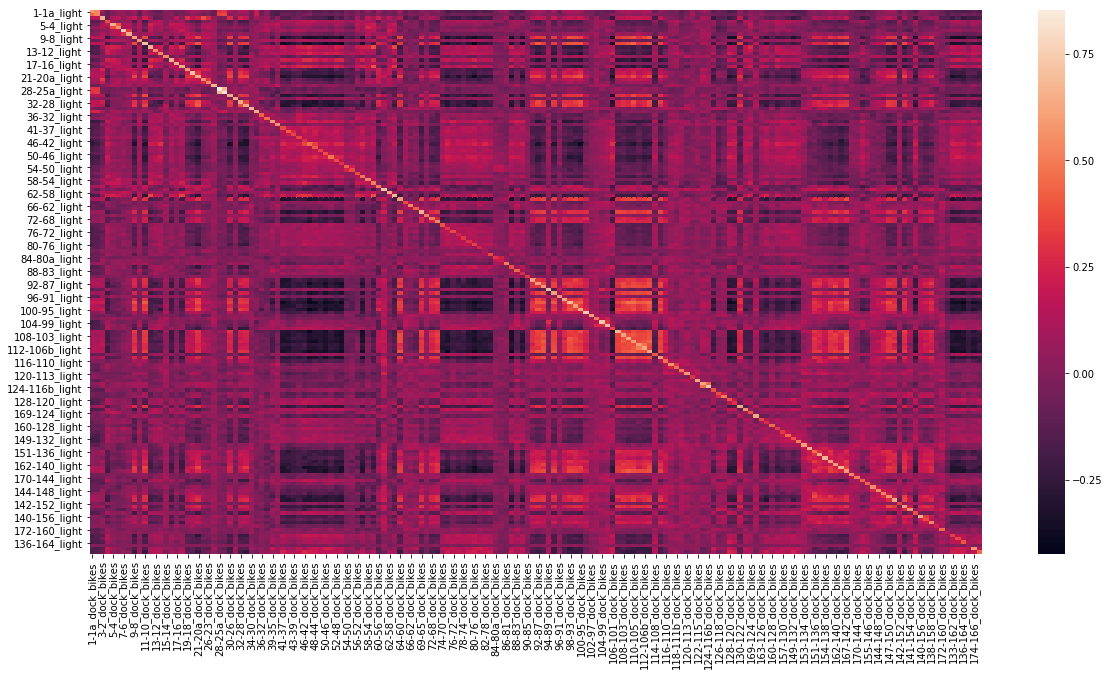

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_dock_light)
plt.show()

In [65]:
def correlation_with_light(value):
    df_light = pre2.make_all_dataset(data_path, value='light', by_postal_code=False, verbose=False)
    df_value = pre2.make_all_dataset(data_path, value=value, by_postal_code=False, verbose=False)
    df_value_light = df_light.set_index('Date').join(df_value.set_index('Date'))
    corr_value_light = df_value_light.corr()
    columns = [x for x in corr_value_light.columns if value in x]
    index = [x for x in corr_value_light.index if 'light' in x]
    corr_value_light = corr_value_light.loc[index, columns]
    plt.figure(figsize=(20,10))
    sns.heatmap(corr_value_light)
    plt.show()

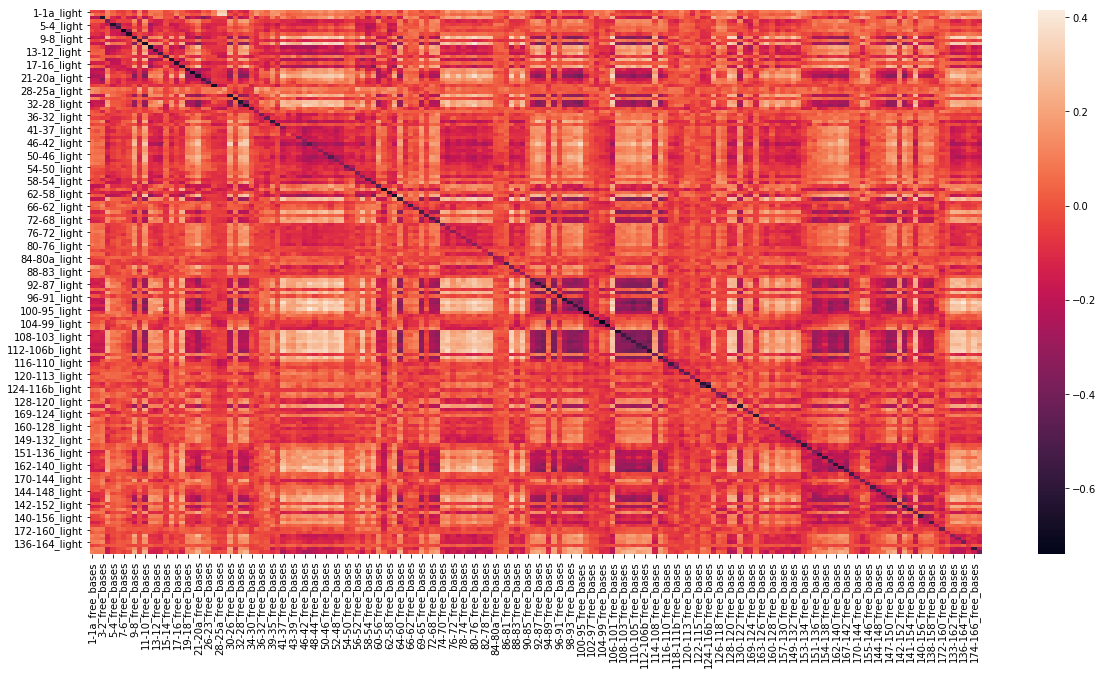

In [66]:
df_light_freeBases_corr = correlation_with_light('free_bases')

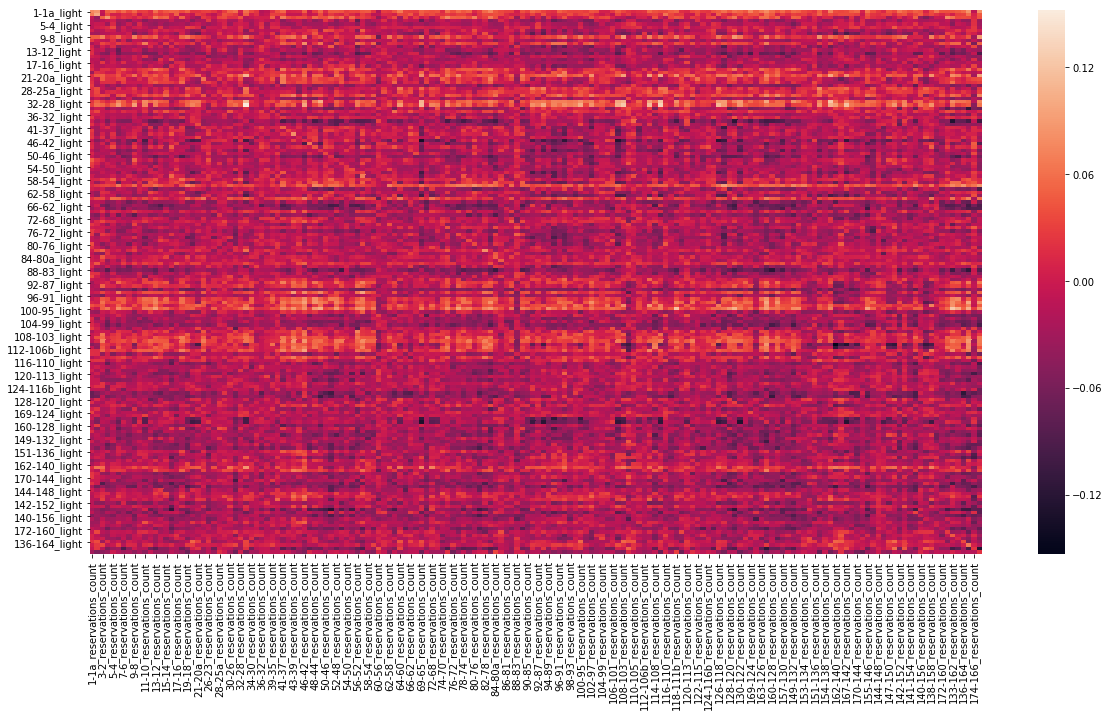

In [67]:
df_light_freeBases_corr = correlation_with_light('reservations_count')

### Conclusions point 5. Light

- #### As it is seen above, the *light* data is absolutely correlated with *free_bases* and *dock_bikes*, therefore it is been decided to keep this feature in "stand-by" since it does not provide more information than the other two.

## 6. Plot series by Postal Code

#### The objective of this point is to see the times-series plot of the postal codes in order to see if an ARIMA model will be good for this prediction.

#### The variable to predict will be:

$$occupation\_rate = \frac{dock\_bikes}{total\_bases}$$

#### since with this way, *total_bases* is taken into account as well as the *free_bases*, since it is used for calculating *total_bases*.

In [68]:
df_dock_bikes_pc = pre2.make_all_dataset(data_path, value='dock_bikes', by_postal_code=True, verbose=True)

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet


In [69]:
df_total_bases_pc = pre2.total_bases_dataset(data_path, by_postal_code=True)

In [70]:
df_dock_bikes_pc_np = df_dock_bikes_pc[df_dock_bikes_pc.columns[1:]].values
df_total_bases_pc_np = df_total_bases_pc[df_total_bases_pc.columns[1:]].values

In [71]:
occuption_rate_np = df_dock_bikes_pc_np / df_total_bases_pc_np
occuption_rate_np

array([[0.17490494, 0.20708447, 0.41363636, ..., 0.55294118, 0.57142857,
        0.17391304],
       [0.14828897, 0.18478261, 0.4479638 , ..., 0.55952381, 0.6       ,
        0.27272727],
       [0.17870722, 0.19021739, 0.43181818, ..., 0.55952381, 0.57142857,
        0.18181818],
       ...,
       [0.50775194, 0.46648045, 0.47465438, ..., 0.38636364, 0.68571429,
        0.59090909],
       [0.5       , 0.51820728, 0.48372093, ..., 0.36363636, 0.64285714,
        0.71428571],
       [0.48235294, 0.51111111, 0.4953271 , ..., 0.38636364, 0.61428571,
        0.71428571]])

In [72]:
occuption_rate = pd.DataFrame(occuption_rate_np)
occuption_rate.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18
0  0.174905  0.207084  0.413636  0.697778  0.376623  0.217391  0.704819  0.154982  0.451524  0.696262  0.424528  0.167630  0.681159  0.410526  0.629630  0.509202  0.552941  0.571429  0.173913
1  0.148289  0.184783  0.447964  0.760000  0.373391  0.226087  0.690691  0.135531  0.462604  0.686916  0.443396  0.150289  0.773050  0.421053  0.660494  0.557576  0.559524  0.600000  0.272727
2  0.178707  0.190217  0.431818  0.706667  0.369099  0.220779  0.711712  0.095238  0.482094  0.704225  0.466981  0.144509  0.785714  0.436170  0.662577  0.596386  0.559524  0.571429  0.181818
3  0.126437  0.173913  0.429864  0.725664  0.399142  0.232759  0.703927  0.091575  0.501377  0.741784  0.473934  0.144509  0.792857  0.547368  0.668712  0.584337  0.607143  0.557143  0.227273
4  0.095420  0.160326  0.407240  0.725664  0.399142  0.233766  0.677711  0.091575  0.501377  0.765258  0.417062  0.173410  0.792857  0.578947  0.674847  0.608434  0.607143  0.557143  0.272727

In [73]:
occuption_rate.columns = df_dock_bikes_pc.columns[1:]
occuption_rate.head()

28013_dock_bikes  28004_dock_bikes  28015_dock_bikes  28005_dock_bikes  28008_dock_bikes  28014_dock_bikes  28012_dock_bikes  28001_dock_bikes  28009_dock_bikes  28007_dock_bikes  28006_dock_bikes  28046_dock_bikes  28045_dock_bikes  28010_dock_bikes  28003_dock_bikes  28020_dock_bikes  28002_dock_bikes  28036_dock_bikes  28016_dock_bikes
0          0.174905          0.207084          0.413636          0.697778          0.376623          0.217391          0.704819          0.154982          0.451524          0.696262          0.424528          0.167630          0.681159          0.410526          0.629630          0.509202          0.552941          0.571429          0.173913
1          0.148289          0.184783          0.447964          0.760000          0.373391          0.226087          0.690691          0.135531          0.462604          0.686916          0.443396          0.150289          0.773050          0.421053          0.660494          0.557576          0.559524          0.600000          0.272727
2          0.178707          0.190217          0.431818          0.706667          0.369099          0.220779          0.711712          0.095238          0.482094          0.704225          0.466981          0.144509          0.785714          0.436170          0.662577          0.596386          0.559524          0.571429          0.181818
3          0.126437          0.173913          0.429864          0.725664          0.399142          0.232759          0.703927          0.091575          0.501377          0.741784          0.473934          0.144509          0.792857          0.547368          0.668712          0.584337          0.607143          0.557143          0.227273
4          0.095420          0.160326          0.407240          0.725664          0.399142          0.233766          0.677711          0.091575          0.501377          0.765258          0.417062          0.173410          0.792857          0.578947          0.674847          0.608434          0.607143          0.557143          0.272727

In [74]:
occuption_rate.index = df_dock_bikes_pc['Date']
occuption_rate.head()

28013_dock_bikes  28004_dock_bikes  28015_dock_bikes  28005_dock_bikes  28008_dock_bikes  28014_dock_bikes  28012_dock_bikes  28001_dock_bikes  28009_dock_bikes  28007_dock_bikes  28006_dock_bikes  28046_dock_bikes  28045_dock_bikes  28010_dock_bikes  28003_dock_bikes  28020_dock_bikes  28002_dock_bikes  28036_dock_bikes  28016_dock_bikes
Date                                                                                                                                                                                                                                                                                                                                                                     
2018-08-01 00:58:00          0.174905          0.207084          0.413636          0.697778          0.376623          0.217391          0.704819          0.154982          0.451524          0.696262          0.424528          0.167630          0.681159          0.410526          0.629630          0.509202          0.552941          0.571429          0.173913
2018-08-01 01:58:00          0.148289          0.184783          0.447964          0.760000          0.373391          0.226087          0.690691          0.135531          0.462604          0.686916          0.443396          0.150289          0.773050          0.421053          0.660494          0.557576          0.559524          0.600000          0.272727
2018-08-01 02:58:00          0.178707          0.190217          0.431818          0.706667          0.369099          0.220779          0.711712          0.095238          0.482094          0.704225          0.466981          0.144509          0.785714          0.436170          0.662577          0.596386          0.559524          0.571429          0.181818
2018-08-01 03:58:00          0.126437          0.173913          0.429864          0.725664          0.399142          0.232759          0.703927          0.091575          0.501377          0.741784          0.473934          0.144509          0.792857          0.547368          0.668712          0.584337          0.607143          0.557143          0.227273
2018-08-01 04:58:00          0.095420          0.160326          0.407240          0.725664          0.399142          0.233766          0.677711          0.091575          0.501377          0.765258          0.417062          0.173410          0.792857          0.578947          0.674847          0.608434          0.607143          0.557143          0.272727

In [75]:
postal_codes = occuption_rate.columns
len(postal_codes)

19

''

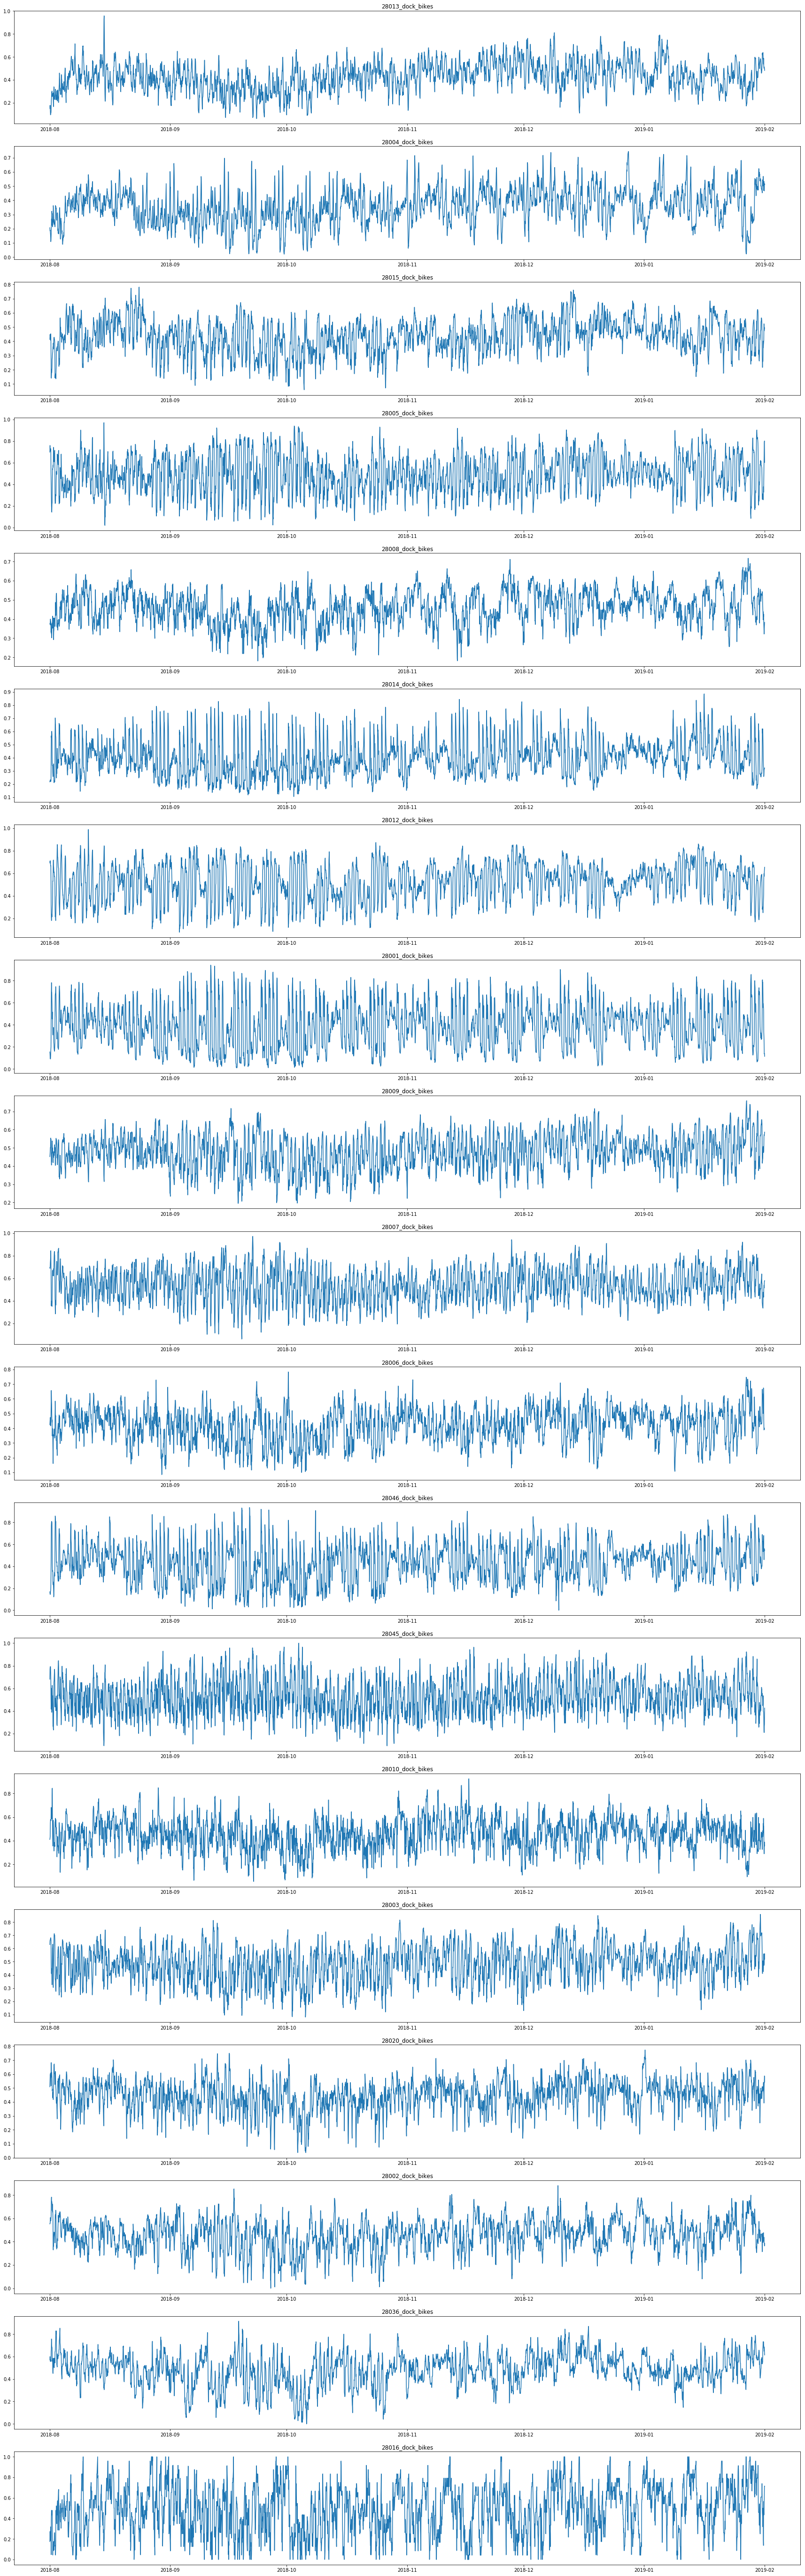

<Figure size 720x3600 with 0 Axes>

In [76]:
fig, axs = plt.subplots(len(postal_codes),1)
plt.figure(figsize=(10,50))
fig.set_figheight(100)
fig.set_figwidth(30)

for i, postal_code in enumerate(postal_codes):
        axs[i].plot(occuption_rate.index, occuption_rate[postal_code])
        axs[i].set_title(postal_code)
;

#### As it is seen above, the times series by hour have a lot of noise because in the same day the *free_bases* and *dock_bikes* can have extreme values.

#### With the above point and and due to the nature of the problem, it has been decided to do de prediction by day:

$$occupation\_rate\_by\_day = \frac{mean(dock\_bikes)} {mean(total\_bases)}$$

#### Where :

- mean(dock\_bikes) is the mean of the dock_bikes feature by day
- mean(total\_bases) is the mean of the total_bases feature by day (which may be constant the most of the days)

In [77]:
df_dock_bikes_pc.set_index('Date', inplace=True)
df_total_bases_pc.set_index('Date', inplace=True)

In [78]:
print(df_dock_bikes_pc.shape)
print(df_total_bases_pc.shape)

(4422, 19)
(4422, 19)


In [79]:
df_dock_bikes_pc_day = df_dock_bikes_pc.resample('D').mean()
df_total_bases_pc_day = df_total_bases_pc.resample('D').mean()

In [80]:
print(df_dock_bikes_pc_day.shape)
print(df_total_bases_pc_day.shape)

(185, 19)
(185, 19)


In [81]:
df_dock_bikes_pc_day_np = df_dock_bikes_pc_day[df_dock_bikes_pc_day.columns].values
df_total_bases_pc_day_np = df_total_bases_pc_day[df_total_bases_pc_day.columns].values

#### Kindly note that there is not neccesary to be aware for divisions by zero because numpy says:

*Division by zero always yields zero in integer arithmetic*

In [82]:
df_occupation_rate_day_np = df_dock_bikes_pc_day_np / df_total_bases_pc_day_np
df_occupation_rate_day_np

array([[0.21074315, 0.22918085, 0.32394632, ..., 0.60615229, 0.58809524,
        0.25693161],
       [0.26791972, 0.2852715 , 0.30180095, ..., 0.46818182, 0.63478781,
        0.29250457],
       [0.30528846, 0.23239356, 0.37932345, ..., 0.5727227 , 0.66949666,
        0.45330739],
       ...,
       [0.49992001, 0.53947668, 0.4496695 , ..., 0.44739382, 0.55348837,
        0.57665505],
       [0.5426104 , 0.50357885, 0.42416651, ..., 0.43396226, 0.61022928,
        0.52133581],
       [0.48235294, 0.51111111, 0.4953271 , ..., 0.38636364, 0.61428571,
        0.71428571]])

In [83]:
df_occupation_rate_day = pd.DataFrame(df_occupation_rate_day_np)
df_occupation_rate_day.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18
0  0.210743  0.229181  0.323946  0.508977  0.360801  0.350768  0.485830  0.370387  0.477119  0.602909  0.426080  0.386879  0.518685  0.559277  0.525608  0.539634  0.606152  0.588095  0.256932
1  0.267920  0.285271  0.301801  0.494181  0.417410  0.379861  0.502940  0.404514  0.481139  0.614143  0.366510  0.479472  0.514557  0.438078  0.487971  0.511259  0.468182  0.634788  0.292505
2  0.305288  0.232394  0.379323  0.470126  0.407722  0.457523  0.550816  0.446035  0.420614  0.654341  0.399006  0.444580  0.593095  0.372398  0.454995  0.465535  0.572723  0.669497  0.453307
3  0.360549  0.189189  0.416667  0.389521  0.485797  0.424783  0.479701  0.475740  0.504981  0.580719  0.454408  0.473976  0.562042  0.419877  0.526525  0.490101  0.518484  0.555746  0.491611
4  0.363232  0.363521  0.528096  0.378999  0.465523  0.366968  0.417175  0.465127  0.445500  0.453208  0.541930  0.480413  0.496907  0.537654  0.529196  0.503265  0.533654  0.499412  0.452080

In [84]:
columns = [x.split("_")[0] + "_" + "OccupationRate" for x in df_dock_bikes_pc_day.columns]
df_occupation_rate_day.columns = columns
df_occupation_rate_day.index = df_total_bases_pc_day.index
df_occupation_rate_day.head()

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  28016_OccupationRate
Date                                                                                                                                                                                                                                                                                                                                                                                                                                        
2018-08-01              0.210743              0.229181              0.323946              0.508977              0.360801              0.350768              0.485830              0.370387              0.477119              0.602909              0.426080              0.386879              0.518685              0.559277              0.525608              0.539634              0.606152              0.588095              0.256932
2018-08-02              0.267920              0.285271              0.301801              0.494181              0.417410              0.379861              0.502940              0.404514              0.481139              0.614143              0.366510              0.479472              0.514557              0.438078              0.487971              0.511259              0.468182              0.634788              0.292505
2018-08-03              0.305288              0.232394              0.379323              0.470126              0.407722              0.457523              0.550816              0.446035              0.420614              0.654341              0.399006              0.444580              0.593095              0.372398              0.454995              0.465535              0.572723              0.669497              0.453307
2018-08-04              0.360549              0.189189              0.416667              0.389521              0.485797              0.424783              0.479701              0.475740              0.504981              0.580719              0.454408              0.473976              0.562042              0.419877              0.526525              0.490101              0.518484              0.555746              0.491611
2018-08-05              0.363232              0.363521              0.528096              0.378999              0.465523              0.366968              0.417175              0.465127              0.445500              0.453208              0.541930              0.480413              0.496907              0.537654              0.529196              0.503265              0.533654              0.499412              0.452080

In [85]:
def make_df_occupation_rate(df_dock_bikes, df_total_bases):
    df_dock_bikes.set_index('Date', inplace=True)
    df_total_bases.set_index('Date', inplace=True)
    df_dock_bikes = df_dock_bikes.resample('D').mean()
    df_total_bases = df_total_bases.resample('D').mean()
    df_dock_bikes_np = df_dock_bikes[df_dock_bikes.columns].values
    df_total_bases_np = df_total_bases[df_total_bases.columns].values
    df_occupation_rate_np = df_dock_bikes_np / df_total_bases_np
    df_occupation_rate = pd.DataFrame(df_occupation_rate_np)
    columns = [x.split("_")[0] + "_" + "OccupationRate" for x in df_dock_bikes.columns]
    df_occupation_rate.columns = columns
    df_occupation_rate.index = df_dock_bikes.index
    return df_occupation_rate

In [86]:
df_dock_bikes_pc = pre2.make_all_dataset(data_path, value='dock_bikes', by_postal_code=True, verbose=True)
df_total_bases_pc = pre2.total_bases_dataset(data_path, by_postal_code=True)

0%[--10%------------------]100%
Bicimad_Estacions_201810.json added to DataSet
0%[----20%----------------]100%
0%[------30%--------------]100%
Bicimad_Stations_201901.json added to DataSet
0%[--------40%------------]100%
0%[----------50%----------]100%
Bicimad_Estacions_201808.json added to DataSet
0%[------------60%--------]100%
Bicimad_Stations_201812.json added to DataSet
0%[--------------70%------]100%
0%[----------------80%----]100%
Bicimad_Estacions_201809.json added to DataSet
0%[------------------90%--]100%
Bicimad_Stations_201811.json added to DataSet


In [87]:
make_df_occupation_rate(df_dock_bikes_pc, df_total_bases_pc)

28013_OccupationRate  28004_OccupationRate  28015_OccupationRate  28005_OccupationRate  28008_OccupationRate  28014_OccupationRate  28012_OccupationRate  28001_OccupationRate  28009_OccupationRate  28007_OccupationRate  28006_OccupationRate  28046_OccupationRate  28045_OccupationRate  28010_OccupationRate  28003_OccupationRate  28020_OccupationRate  28002_OccupationRate  28036_OccupationRate  28016_OccupationRate
Date                                                                                                                                                                                                                                                                                                                                                                                                                                        
2018-08-01              0.210743              0.229181              0.323946              0.508977              0.360801              0.350768              0.485830              0.370387              0.477119              0.602909              0.426080              0.386879              0.518685              0.559277              0.525608              0.539634              0.606152              0.588095              0.256932
2018-08-02              0.267920              0.285271              0.301801              0.494181              0.417410              0.379861              0.502940              0.404514              0.481139              0.614143              0.366510              0.479472              0.514557              0.438078              0.487971              0.511259              0.468182              0.634788              0.292505
2018-08-03              0.305288              0.232394              0.379323              0.470126              0.407722              0.457523              0.550816              0.446035              0.420614              0.654341              0.399006              0.444580              0.593095              0.372398              0.454995              0.465535              0.572723              0.669497              0.453307
2018-08-04              0.360549              0.189189              0.416667              0.389521              0.485797              0.424783              0.479701              0.475740              0.504981              0.580719              0.454408              0.473976              0.562042              0.419877              0.526525              0.490101              0.518484              0.555746              0.491611
2018-08-05              0.363232              0.363521              0.528096              0.378999              0.465523              0.366968              0.417175              0.465127              0.445500              0.453208              0.541930              0.480413              0.496907              0.537654              0.529196              0.503265              0.533654              0.499412              0.452080
2018-08-06              0.513362              0.379949              0.546976              0.399603              0.424103              0.424583              0.411680              0.497013              0.441649              0.462619              0.466234              0.482522              0.496117              0.425486              0.443367              0.408915              0.497955              0.515355              0.447684
2018-08-07              0.483417              0.389443              0.467139              0.445691              0.523320              0.430819              0.457853              0.433079              0.462348              0.457863              0.449457              0.475478              0.512202              0.415378              0.464543              0.345895              0.430720              0.483492              0.240964
2018-08-08              0.397729              0.409967              0.468458              0.547779              0.445024              0.360783         

In [88]:
postal_codes = df_occupation_rate_day.columns
len(postal_codes)

19

''

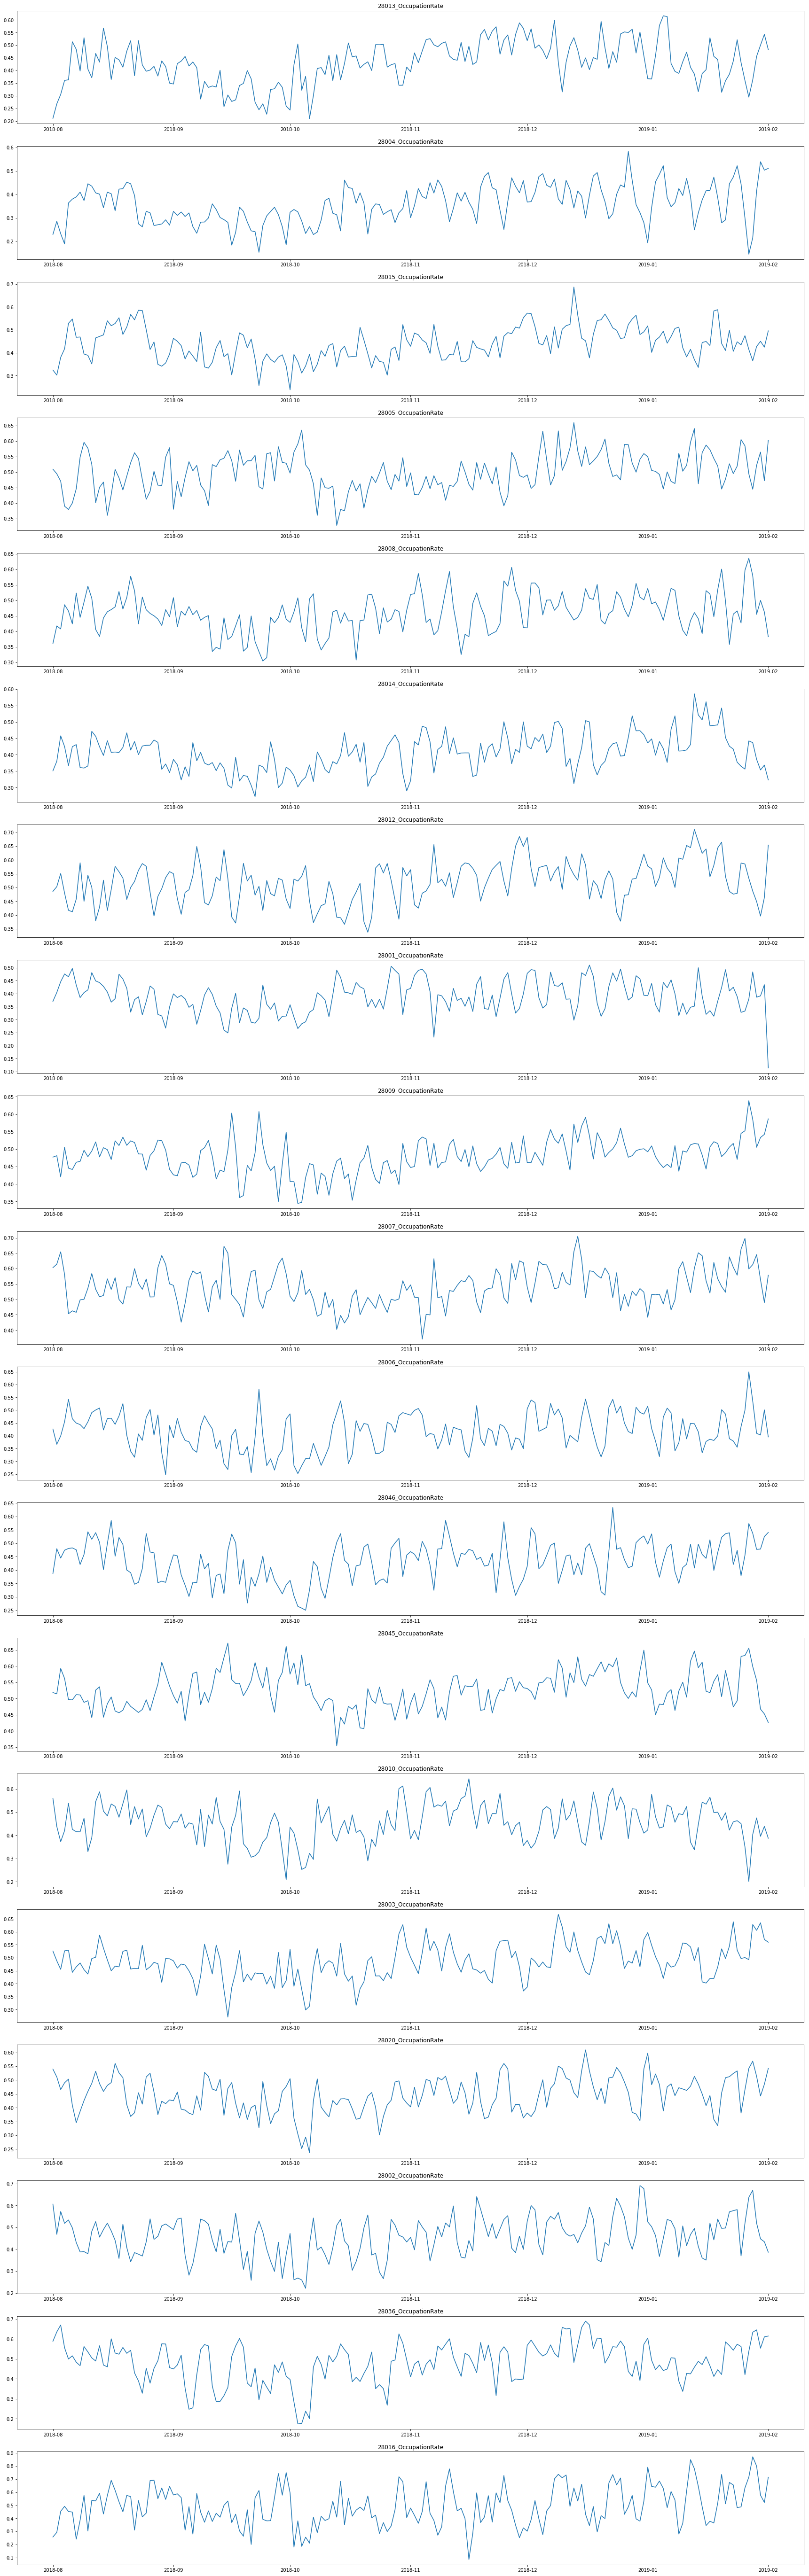

<Figure size 720x3600 with 0 Axes>

In [89]:
fig, axs = plt.subplots(len(postal_codes),1)
plt.figure(figsize=(10,50))
fig.set_figheight(100)
fig.set_figwidth(30)

for i, postal_code in enumerate(postal_codes):
        axs[i].plot(df_occupation_rate_day.index, df_occupation_rate_day[postal_code])
        axs[i].set_title(postal_code)
;

#### Now, it is going to be cheked the stationary of the times series in order to see if an ARIMA is good for the data:

Take into account:

- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

And p-value is used for that:

- **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


*Source: https://machinelearningmastery.com/time-series-data-stationary-python/*

In [90]:
from statsmodels.tsa.stattools import adfuller

In [91]:
stationary_list = []
nonstationary_list = []

for i, postal_code in enumerate(postal_codes):
        test = adfuller(df_occupation_rate_day[postal_code])
        print(postal_code)
        if test[1] > 0.05:
            print('\n---> NON-STATIONARY <---\n')
            nonstationary_list.append(postal_code)
        else:
            print('\n---> STATIONARY <---\n')
            stationary_list.append(postal_code)
        print('ADF Statistic: %f' % test[0])
        print('p-value: %f' % test[1])
        print('Critical Values:')
        for key, value in test[4].items():
            print('\t%s: %.3f' % (key, value))
        print('=======================================')

28013_OccupationRate

---> NON-STATIONARY <---

ADF Statistic: -2.268213
p-value: 0.182425
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575
28004_OccupationRate

---> NON-STATIONARY <---

ADF Statistic: -2.416852
p-value: 0.137037
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
28015_OccupationRate

---> STATIONARY <---

ADF Statistic: -4.464494
p-value: 0.000228
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575
28005_OccupationRate

---> NON-STATIONARY <---

ADF Statistic: -1.986359
p-value: 0.292586
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576
28008_OccupationRate

---> NON-STATIONARY <---

ADF Statistic: -2.861415
p-value: 0.050022
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
28014_OccupationRate

---> NON-STATIONARY <---

ADF Statistic: -2.817163
p-value: 0.055864
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575
28012_OccupationRate

---> NON-STATIONARY <---

ADF Statistic: -2.474105
p-value: 0.121903
Critical Values:
	1%: -3.468
	5%: -2.878
	1

In [92]:
stationary_list

['28015_OccupationRate',
 '28001_OccupationRate',
 '28006_OccupationRate',
 '28045_OccupationRate',
 '28010_OccupationRate',
 '28003_OccupationRate',
 '28020_OccupationRate',
 '28036_OccupationRate',
 '28016_OccupationRate']

In [93]:
nonstationary_list

['28013_OccupationRate',
 '28004_OccupationRate',
 '28005_OccupationRate',
 '28008_OccupationRate',
 '28014_OccupationRate',
 '28012_OccupationRate',
 '28009_OccupationRate',
 '28007_OccupationRate',
 '28046_OccupationRate',
 '28002_OccupationRate']

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

28013_OccupationRate


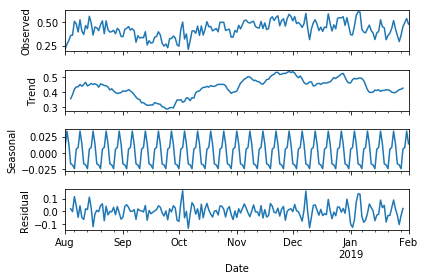

28004_OccupationRate


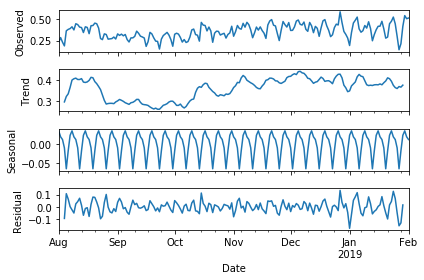

28005_OccupationRate


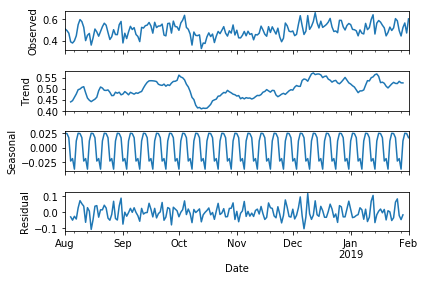

28008_OccupationRate


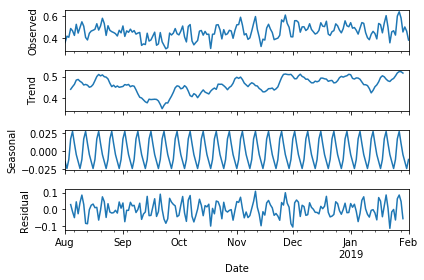

28014_OccupationRate


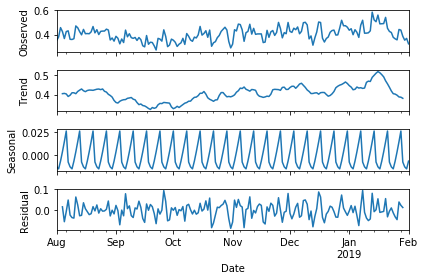

28012_OccupationRate


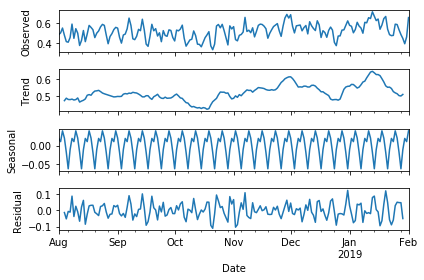

28009_OccupationRate


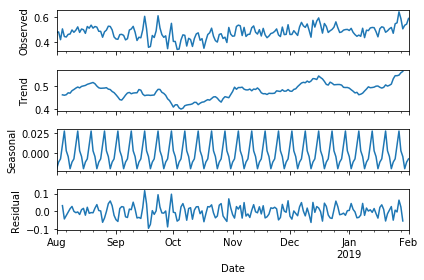

28007_OccupationRate


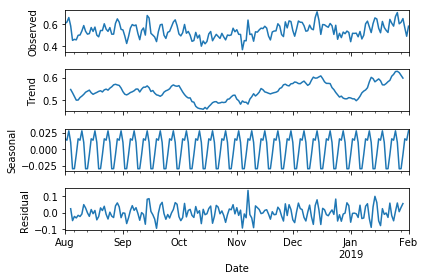

28046_OccupationRate


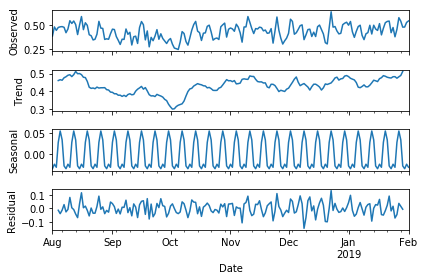

28002_OccupationRate


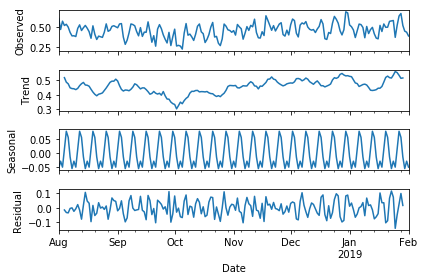

In [95]:
#This plot has to assigned to a variable because it returns the plot besides the plot itself.
#Therfore, it makes two plots.

for postal_code in nonstationary_list:
    print(postal_code)
    x = seasonal_decompose(df_occupation_rate_day[postal_code], model='additive').plot()
    plt.show()

### Conclusions point 6. Plot series by Postal Code

- #### Because many postal codes are not stationary and heteroscedasticit is no appreciatted, it is decided to apply a machine learning method and get rid of the idea of ARIMA times series model

- #### We have added the function *make_df_occupation_rate(df_dock_bikes, df_total_bases)* to the library *preprocessing_v2*